<a href="https://colab.research.google.com/github/muratgguzel/AIML-DeepLearnig-Introduction-Neural-Networks/blob/main/LeadGenAIEngineev_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective



### Data Dictionary







## 1-LOADING LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay as plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# To impute missing values
from sklearn.impute import KNNImputer

# To oversample and undersample data
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA


# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

##2-LOADING AND EXPLORING DATA

- Loading Data Form CSV

In [ ]:
Row_Data = pd.read_csv("https://raw.githubusercontent.com/SergeyKrupeninEPAM/LeadGenAIEngine/master/Release_2_Generated_test_05-31-2023.csv?token=GHSAT0AAAAAACCSWB7MMYINYJLQRBO65JLMZDXY3GA",encoding='utf-8',dtype="str")


- Copying row data for working

In [ ]:
# copying data to another variable to avoid any changes to original data
data = Row_Data.copy()

 View the first and last 5 rows of the dataset.

In [ ]:
data.columns

Index(['LinkedIn_Profile', 'LinkedIn_Follower_Count',
       'Linkedin_Connection_Count', 'Full_Name', 'Searched_Email',
       'Previous_Seniority_Level', 'Current_Seniority_Level',
       'Previous_Company', 'Previous_Company_Size',
       'Previous_Company_Employess_On_Linkedin', 'Previous_Company_Followers',
       'Previous_Company_Parent_Cmp_exist', 'Current_Company',
       'Current_Company_Size', 'Current_Company_Employess_On_Linkedin',
       'Current_Company_Followers', 'Current_Company_Rev',
       'Current_Company_Parent_Cmp_exist', 'Engegement_Cnt_Epam',
       'Communication_intensity', 'First_engagement_year',
       'Engagement_Duration_Epam', 'Seniority_Level_Of_Epam',
       'Engegement_Cnt_Epam_C_track_CommIntens', 'Engegement_Cnt_Epam_C_track',
       'Previous_Company_Forbes', 'Current_Company_Forbes',
       'Previous_Company_Industry', 'Current_Company_Industry',
       'Previous_Company_Satisfaction_Category',
       'Previous_Company_Average_NPS'],
      dtype=

In [ ]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  

There are 2245 rows and 31 columns.


The dataset has 2245 rows and 31 columns 

In [ ]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

Previous_Company_Average_NPS              0.126949
Current_Company_Employess_On_Linkedin     0.098886
Current_Company_Followers                 0.085969
Linkedin_Connection_Count                 0.035189
LinkedIn_Follower_Count                   0.033853
Engegement_Cnt_Epam                       0.028062
Communication_intensity                   0.028062
First_engagement_year                     0.028062
Engagement_Duration_Epam                  0.028062
Engegement_Cnt_Epam_C_track_CommIntens    0.028062
Engegement_Cnt_Epam_C_track               0.028062
Current_Company_Rev                       0.015590
Previous_Company_Employess_On_Linkedin    0.002227
Previous_Company_Followers                0.001782
dtype: float64

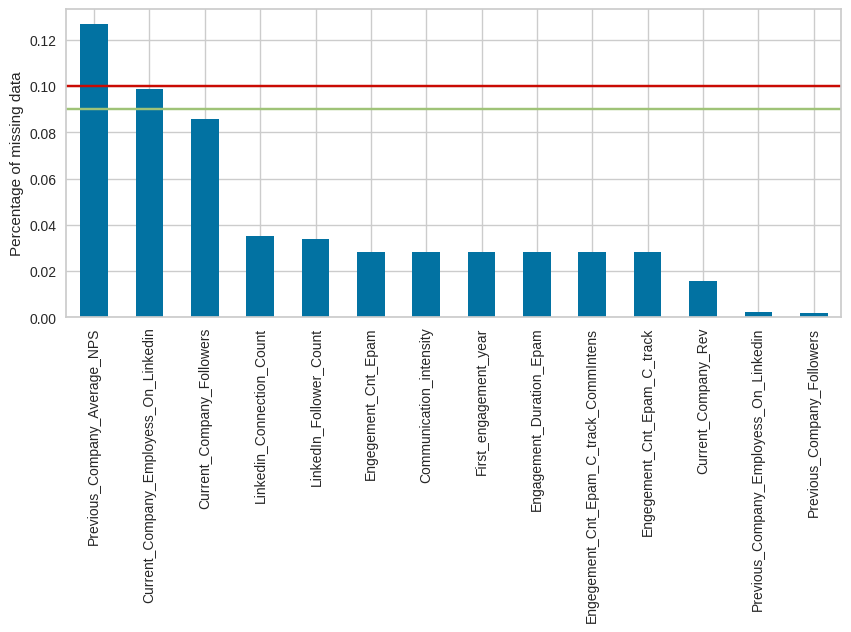

In [ ]:
data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.axhline(y=0.09, color='g', linestyle='-')

plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   LinkedIn_Profile                        2245 non-null   object
 1   LinkedIn_Follower_Count                 2169 non-null   object
 2   Linkedin_Connection_Count               2166 non-null   object
 3   Full_Name                               2245 non-null   object
 4   Searched_Email                          2245 non-null   object
 5   Previous_Seniority_Level                2245 non-null   object
 6   Current_Seniority_Level                 2245 non-null   object
 7   Previous_Company                        2245 non-null   object
 8   Previous_Company_Size                   2245 non-null   object
 9   Previous_Company_Employess_On_Linkedin  2240 non-null   object
 10  Previous_Company_Followers              2241 non-null   object
 11  Prev

In [ ]:
data.isnull().sum()

LinkedIn_Profile                            0
LinkedIn_Follower_Count                    76
Linkedin_Connection_Count                  79
Full_Name                                   0
Searched_Email                              0
Previous_Seniority_Level                    0
Current_Seniority_Level                     0
Previous_Company                            0
Previous_Company_Size                       0
Previous_Company_Employess_On_Linkedin      5
Previous_Company_Followers                  4
Previous_Company_Parent_Cmp_exist           0
Current_Company                             0
Current_Company_Size                        0
Current_Company_Employess_On_Linkedin     222
Current_Company_Followers                 193
Current_Company_Rev                        35
Current_Company_Parent_Cmp_exist            0
Engegement_Cnt_Epam                        63
Communication_intensity                    63
First_engagement_year                      63
Engagement_Duration_Epam          

In [ ]:
data.isnull().values.any()

True

Missing Values counts  per Row 

In [ ]:
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    1662
1     267
2     191
3      42
6      38
4      18
7      14
9       6
8       5
5       2
dtype: int64

In [ ]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

LinkedIn_Profile                           0.00
LinkedIn_Follower_Count                    3.39
Linkedin_Connection_Count                  3.52
Full_Name                                  0.00
Searched_Email                             0.00
Previous_Seniority_Level                   0.00
Current_Seniority_Level                    0.00
Previous_Company                           0.00
Previous_Company_Size                      0.00
Previous_Company_Employess_On_Linkedin     0.22
Previous_Company_Followers                 0.18
Previous_Company_Parent_Cmp_exist          0.00
Current_Company                            0.00
Current_Company_Size                       0.00
Current_Company_Employess_On_Linkedin      9.89
Current_Company_Followers                  8.60
Current_Company_Rev                        1.56
Current_Company_Parent_Cmp_exist           0.00
Engegement_Cnt_Epam                        2.81
Communication_intensity                    2.81
First_engagement_year                   

In [ ]:
data.describe(include="all").T

count unique  \
LinkedIn_Profile                        2245   2245   
LinkedIn_Follower_Count                 2169   1347   
Linkedin_Connection_Count               2166   1345   
Full_Name                               2245   2237   
Searched_Email                          2245   2245   
Previous_Seniority_Level                2245      4   
Current_Seniority_Level                 2245      4   
Previous_Company                        2245    221   
Previous_Company_Size                   2245     10   
Previous_Company_Employess_On_Linkedin  2240    214   
Previous_Company_Followers              2241    219   
Previous_Company_Parent_Cmp_exist       2245      2   
Current_Company                         2245   1491   
Current_Company_Size                    2245     10   
Current_Company_Employess_On_Linkedin   2023   1079   
Current_Company_Followers               2052   1288   
Current_Company_Rev                     2210   1125   
Current_Company_Parent_Cmp_exist        2245      2   
Engegement_Cnt_Epam                     2182     79   
Communication_intensity                 2182    835   
First_engagement_year                   2182      6   
Engagement_Duration_Epam                2182      7   
Seniority_Level_Of_Epam                 2245      4   
Engegement_Cnt_Epam_C_track_CommIntens  2182     48   
Engegement_Cnt_Epam_C_track             2182      6   
Previous_Company_Forbes                 2245      2   
Current_Company_Forbes                  2245      2   
Previous_Company_Industry               2245     56   
Current_Company_Industry                2245    115   
Previous_Company_Satisfaction_Category  2245      4   
Previous_Company_Average_NPS            1960     97   

                                                                          top  \
LinkedIn_Profile                        https://www.linkedin.com/in/bajjarapu   
LinkedIn_Follower_Count                                                 915.0   
Linkedin_Connection_Count                                               612.0   
Full_Name                                                     Rajesh Mapakshi   
Searched_Email                                   bhaskar.ajjarapu@equifax.com   
Previous_Seniority_Level                                                    B   
Current_Seniority_Level                                                     B   
Previous_Company                                           Cerner Corporation   
Previous_Company_Size                                                  10001+   
Previous_Company_Employess_On_Linkedin                                21836.0   
Previous_Company_Followers                                           362379.0   
Previous_Company_Parent_Cmp_exist                                           0   
Current_Company                                                        Amazon   
Current_Company_Size                                                   10001+   
Current_Company_Employess_On_Linkedin                                829209.0   
Current_Company_Followers                                          30368165.0   
Current_Company_Rev                                                       5.0   
Current_Company_Parent_Cmp_exist                                            0   
Engegement_Cnt_Epam                                                       4.0   
Communication_intensity                                                  22.0   
First_engagement_year                                                  2017.0   
Engagement_Duration_Epam                                                  2.0   
Seniority_Level_Of_Epam                                                     B   
Engegement_Cnt_Epam_C_track_CommIntens                                    0.0   
Engegement_Cnt_Epam_C_track                                               0.0   
Previous_Company_Forbes                                                     0   
Current_Company_Forbes                                                      0   
Previous_C

**2.1** **Observations About Data**

**2.2** **Statistical Observations**

Print data values generalization behaviour

In [ ]:
data[data.duplicated()].count()

LinkedIn_Profile                          0
LinkedIn_Follower_Count                   0
Linkedin_Connection_Count                 0
Full_Name                                 0
Searched_Email                            0
Previous_Seniority_Level                  0
Current_Seniority_Level                   0
Previous_Company                          0
Previous_Company_Size                     0
Previous_Company_Employess_On_Linkedin    0
Previous_Company_Followers                0
Previous_Company_Parent_Cmp_exist         0
Current_Company                           0
Current_Company_Size                      0
Current_Company_Employess_On_Linkedin     0
Current_Company_Followers                 0
Current_Company_Rev                       0
Current_Company_Parent_Cmp_exist          0
Engegement_Cnt_Epam                       0
Communication_intensity                   0
First_engagement_year                     0
Engagement_Duration_Epam                  0
Seniority_Level_Of_Epam         

In [ ]:

print(data.LinkedIn_Profile.value_counts())
print(data.LinkedIn_Follower_Count.value_counts())
print(data.Linkedin_Connection_Count.value_counts())
print(data.Full_Name.value_counts())
print(data.Searched_Email.value_counts())
print(data.Previous_Seniority_Level.value_counts())
print(data.Current_Seniority_Level.value_counts())
print(data.Previous_Company.value_counts())
print(data.Previous_Company_Size.value_counts())
print(data.Previous_Company_Employess_On_Linkedin.value_counts())
print(data.Previous_Company_Followers.value_counts())
print(data.Previous_Company_Parent_Cmp_exist.value_counts())
print(data.Current_Company.value_counts())
print(data.Current_Company_Size.value_counts())
print(data.Current_Company_Employess_On_Linkedin.value_counts())
print(data.Current_Company_Followers.value_counts())
print(data.Current_Company_Parent_Cmp_exist.value_counts())
print(data.Engegement_Cnt_Epam.value_counts())
print(data.Communication_intensity.value_counts())
print(data.First_engagement_year.value_counts())
print(data.Engagement_Duration_Epam.value_counts())
print(data.Seniority_Level_Of_Epam.value_counts())
print(data.Engegement_Cnt_Epam_C_track_CommIntens.value_counts())
print(data.Engegement_Cnt_Epam_C_track.value_counts())
print(data.Previous_Company_Forbes.value_counts())
print(data.Current_Company_Forbes.value_counts())
print(data.Previous_Company_Industry.value_counts())
print(data.Current_Company_Industry.value_counts())
print(data.Previous_Company_Satisfaction_Category.value_counts())
print(data.Previous_Company_Average_NPS.value_counts())










https://www.linkedin.com/in/bajjarapu                      1
https://www.linkedin.com/in/annie-koo/                     1
https://www.linkedin.com/in/jean-louis-delayen-147038a/    1
https://www.linkedin.com/in/dovidgurevich/                 1
https://www.linkedin.com/in/briannaswartz/                 1
                                                          ..
https://www.linkedin.com/in/rajuvdantuluri/                1
https://www.linkedin.com/in/prathyushagottu/               1
https://www.linkedin.com/in/lukphilip                      1
https://www.linkedin.com/in/patrick-gallant                1
https://www.linkedin.com/in/ralrayes/                      1
Name: LinkedIn_Profile, Length: 2245, dtype: int64
915.0     7
563.0     7
887.0     6
608.0     6
309.0     6
         ..
21.0      1
1913.0    1
5902.0    1
836.0     1
985.0     1
Name: LinkedIn_Follower_Count, Length: 1347, dtype: int64
612.0      7
190.0      6
605.0      6
510.0      6
468.0      6
          ..
1779.0    

In [ ]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

LinkedIn_Profile                           0.00
LinkedIn_Follower_Count                    3.39
Linkedin_Connection_Count                  3.52
Full_Name                                  0.00
Searched_Email                             0.00
Previous_Seniority_Level                   0.00
Current_Seniority_Level                    0.00
Previous_Company                           0.00
Previous_Company_Size                      0.00
Previous_Company_Employess_On_Linkedin     0.22
Previous_Company_Followers                 0.18
Previous_Company_Parent_Cmp_exist          0.00
Current_Company                            0.00
Current_Company_Size                       0.00
Current_Company_Employess_On_Linkedin      9.89
Current_Company_Followers                  8.60
Current_Company_Rev                        1.56
Current_Company_Parent_Cmp_exist           0.00
Engegement_Cnt_Epam                        2.81
Communication_intensity                    2.81
First_engagement_year                   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   LinkedIn_Profile                        2245 non-null   object
 1   LinkedIn_Follower_Count                 2169 non-null   object
 2   Linkedin_Connection_Count               2166 non-null   object
 3   Full_Name                               2245 non-null   object
 4   Searched_Email                          2245 non-null   object
 5   Previous_Seniority_Level                2245 non-null   object
 6   Current_Seniority_Level                 2245 non-null   object
 7   Previous_Company                        2245 non-null   object
 8   Previous_Company_Size                   2245 non-null   object
 9   Previous_Company_Employess_On_Linkedin  2240 non-null   object
 10  Previous_Company_Followers              2241 non-null   object
 11  Prev

In [ ]:
data.head(3)

LinkedIn_Profile LinkedIn_Follower_Count  \
0              https://www.linkedin.com/in/bajjarapu                  1210.0   
1  https://www.linkedin.com/in/youssef-ismaili-93...                  1119.0   
2  https://www.linkedin.com/in/carlos-pinzon-4643...                   742.0   

  Linkedin_Connection_Count         Full_Name                  Searched_Email  \
0                    1220.0  Bhaskar Ajjarapu    bhaskar.ajjarapu@equifax.com   
1                    1126.0   Youssef Ismaili     youssef.ismaili@equifax.com   
2                     732.0     Carlos Pinzon  carlos.pinzonpinto@equifax.com   

  Previous_Seniority_Level Current_Seniority_Level Previous_Company  \
0                        C                       A          Equifax   
1                        C                       C          Equifax   
2                        B                       A          Equifax   

  Previous_Company_Size Previous_Company_Employess_On_Linkedin  \
0                10001+                                14124.0   
1                10001+                                14124.0   
2                10001+                                14124.0   

  Previous_Company_Followers Previous_Company_Parent_Cmp_exist  \
0                   173891.0                                 0   
1                   173891.0                                 0   
2                   173891.0                                 0   

  Current_Company Current_Company_Size Current_Company_Employess_On_Linkedin  \
0         Shopify               10001+                               16747.0   
1          Amazon               10001+                              829209.0   
2       Microsoft               10001+                              230503.0   

  Current_Company_Followers Current_Company_Rev  \
0                  713684.0              4611.9   
1                30368165.0            469822.0   
2                19735748.0            198270.0   

  Current_Company_Parent_Cmp_exist Engegement_Cnt_Epam  \
0                                0                 2.0   
1                                0                 7.0   
2                                0                 9.0   

  Communication_intensity First_engagement_year Engagement_Duration_Epam  \
0                    13.0                2019.0                      1.0   
1                    55.0                2019.0                      1.0   
2                   179.0                2019.0                      1.0   

  Seniority_Level_Of_Epam Engegement_Cnt_Epam_C_track_CommIntens  \
0                       C                                    3.0   
1                       B                                    0.0   
2                       B                                    0.0   

  Engegement_Cnt_Epam_C_track Previous_Company_Forbes Current_Company_Forbes  \
0                         1.0                       1                      1   
1                         0.0                       1                      1   
2                         0.0                       1                      1   

  Previous_Company_Industry Current_Company_Industry  \
0        Financial Services        Computer Software   
1        Financial Services        Computer Software   
2        Financial Services        Computer Software   

  Previous_Company_Satisfaction_Category Previous_Company_Average_NPS  
0                                Passive            8.432432432432432  
1                                Passive            8.432432432432432  
2                                Passive            8.432432432432432

Type Casting the Data since all Features comes within String Format

In [ ]:
data["LinkedIn_Follower_Count"]=data["LinkedIn_Follower_Count"].astype(float)

In [ ]:
data["Linkedin_Connection_Count"]=data["Linkedin_Connection_Count"].astype(float)

In [ ]:
data["Previous_Company_Employess_On_Linkedin"]=data["Previous_Company_Employess_On_Linkedin"].astype(float)

In [ ]:
data["Previous_Company_Followers"]=data["Previous_Company_Followers"].astype(float)

In [ ]:
data["Previous_Company_Parent_Cmp_exist"]=data["Previous_Company_Parent_Cmp_exist"].astype(int)

In [ ]:
data["Current_Company_Employess_On_Linkedin"]=data["Current_Company_Employess_On_Linkedin"].astype(float)

In [ ]:
data["Current_Company_Followers"]=data["Current_Company_Followers"].astype(float)

In [ ]:
data["Current_Company_Rev"]=data["Current_Company_Rev"].astype(float)

In [ ]:
data["Current_Company_Parent_Cmp_exist"]=data["Current_Company_Parent_Cmp_exist"].astype(int)

In [ ]:
data["Engegement_Cnt_Epam"]=data["Engegement_Cnt_Epam"].astype(float)

In [ ]:
data["Communication_intensity"]=data["Communication_intensity"].astype(float)

In [ ]:
data["Engagement_Duration_Epam"]=data["Engagement_Duration_Epam"].astype(float)

In [ ]:
data["Engegement_Cnt_Epam_C_track_CommIntens"]=data["Engegement_Cnt_Epam_C_track_CommIntens"].astype(float)

In [ ]:
data["Engegement_Cnt_Epam_C_track"]=data["Engegement_Cnt_Epam_C_track"].astype(float)

In [ ]:
data["Previous_Company_Forbes"]=data["Previous_Company_Forbes"].astype(int)

In [ ]:
data["Current_Company_Forbes"]=data["Current_Company_Forbes"].astype(int)

In [ ]:
data["Previous_Company_Average_NPS"]=data["Previous_Company_Average_NPS"].astype(float)

In [ ]:
data["First_engagement_year"]=data["First_engagement_year"].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LinkedIn_Profile                        2245 non-null   object 
 1   LinkedIn_Follower_Count                 2169 non-null   float64
 2   Linkedin_Connection_Count               2166 non-null   float64
 3   Full_Name                               2245 non-null   object 
 4   Searched_Email                          2245 non-null   object 
 5   Previous_Seniority_Level                2245 non-null   object 
 6   Current_Seniority_Level                 2245 non-null   object 
 7   Previous_Company                        2245 non-null   object 
 8   Previous_Company_Size                   2245 non-null   object 
 9   Previous_Company_Employess_On_Linkedin  2240 non-null   float64
 10  Previous_Company_Followers              2241 non-null   floa

##3-EXPLOTARY DATA ANALYSIS

**3.1-Univarity DATA ANALYSIS**

In [ ]:
data_EDA=data.copy()

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

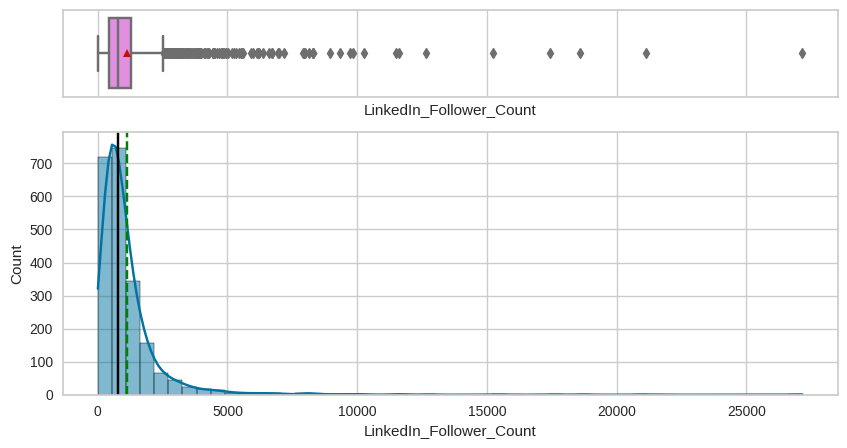

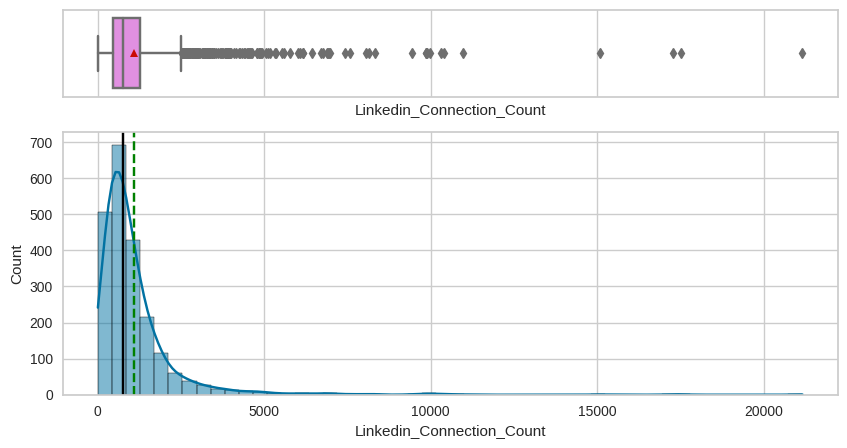

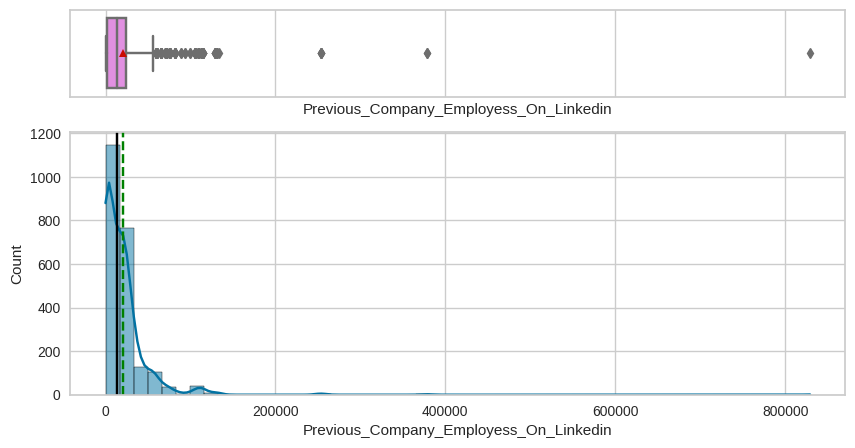

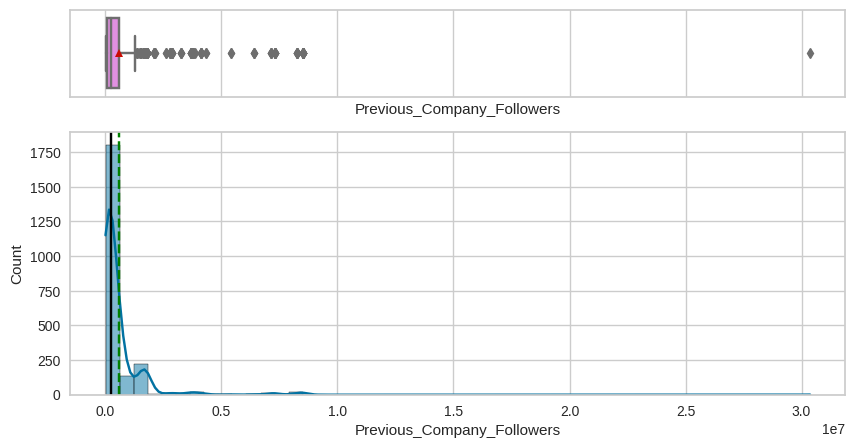

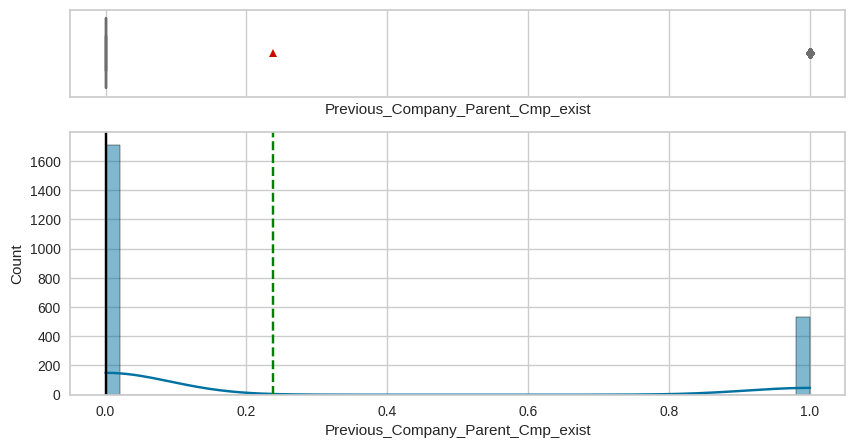

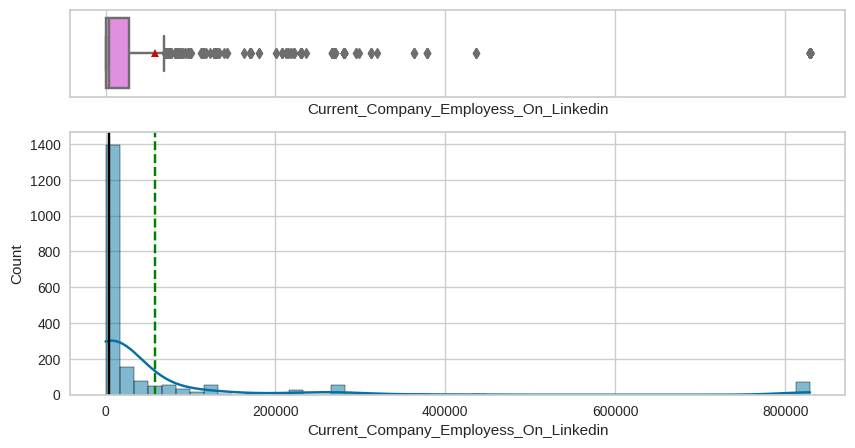

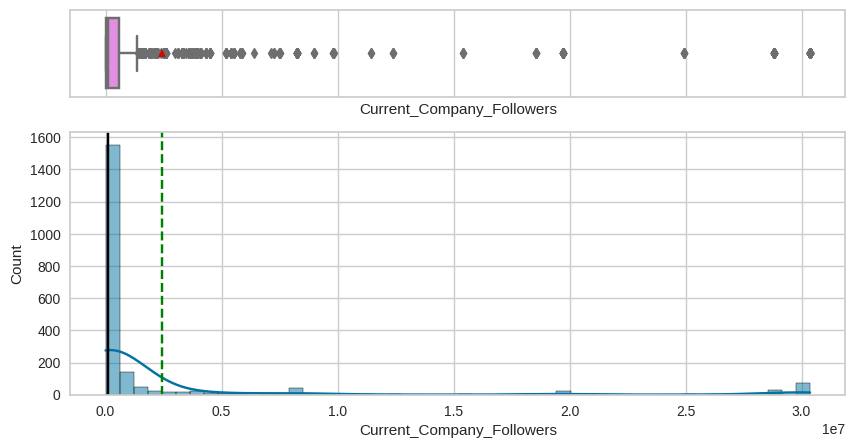

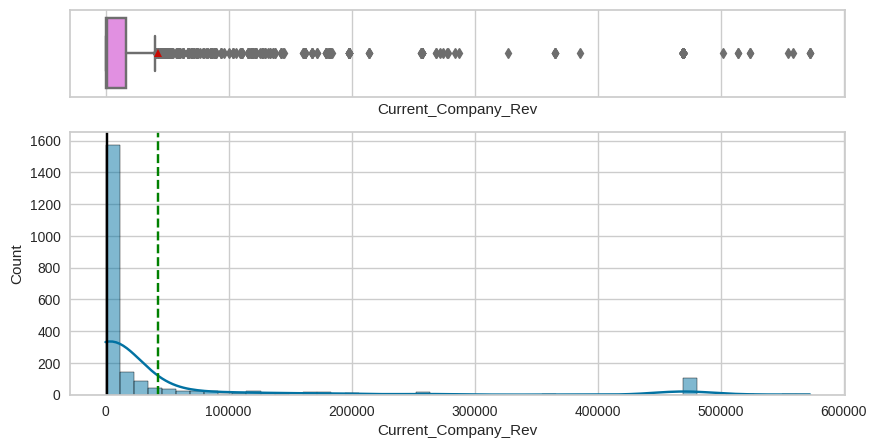

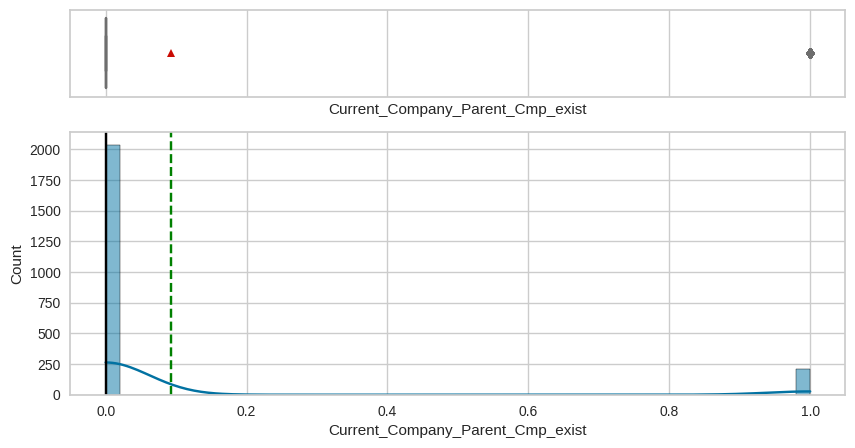

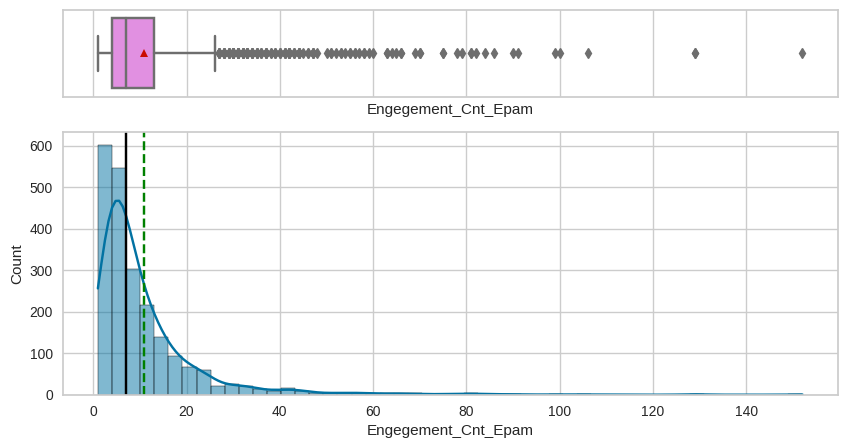

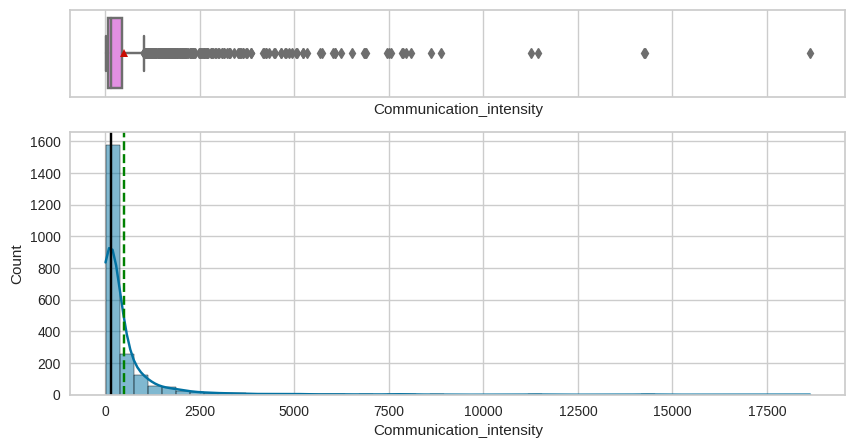

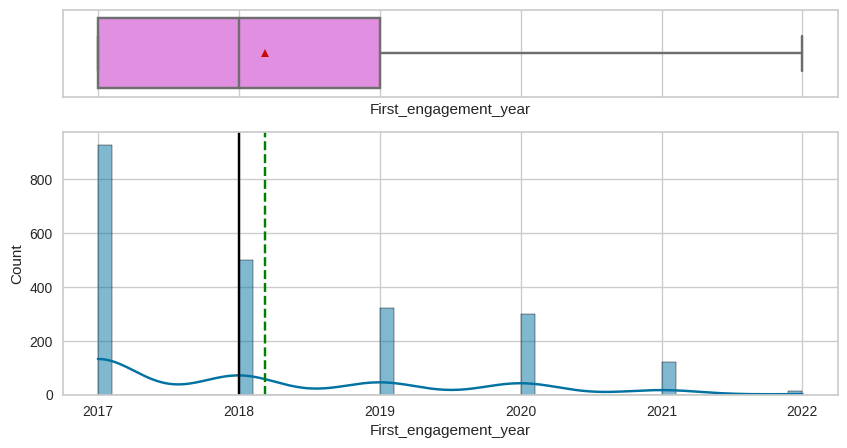

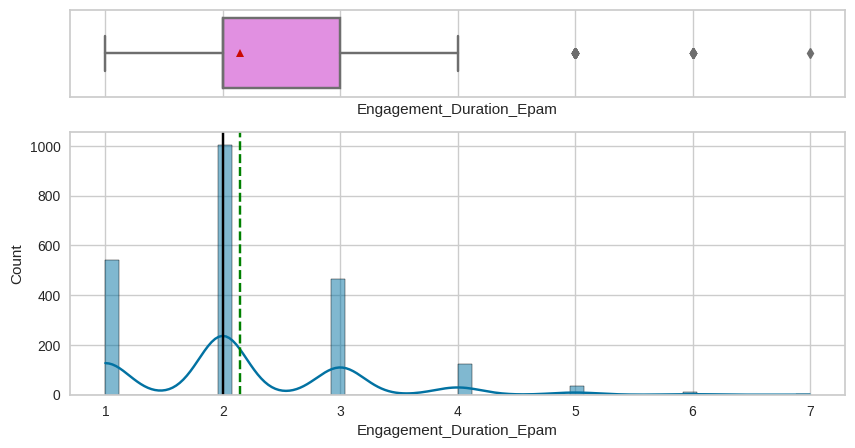

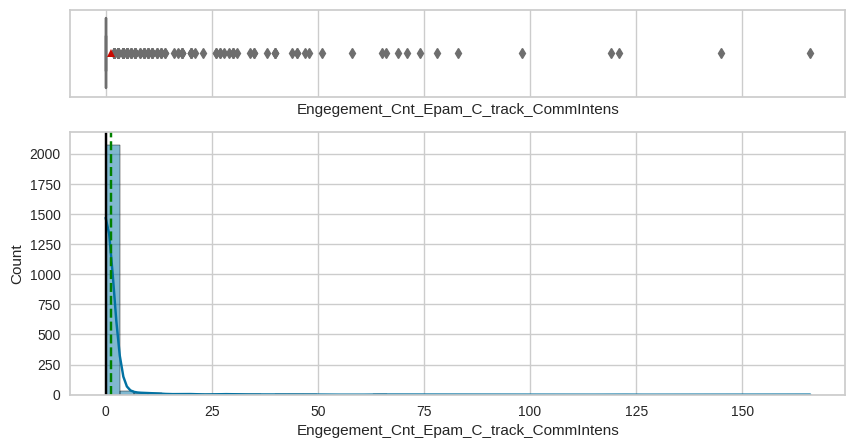

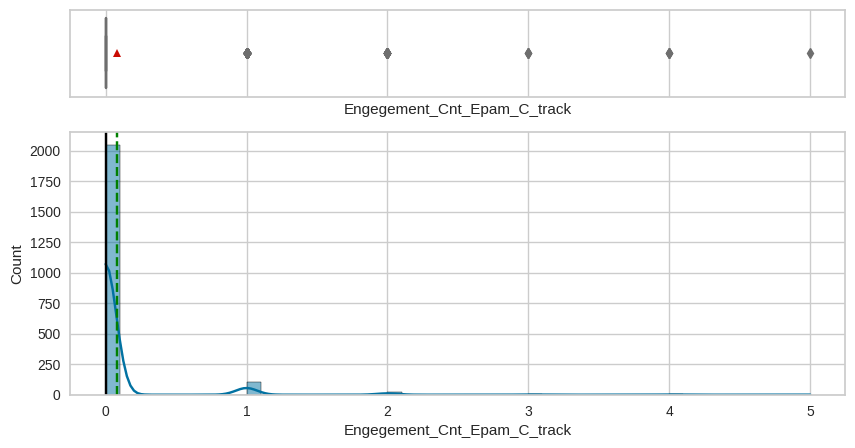

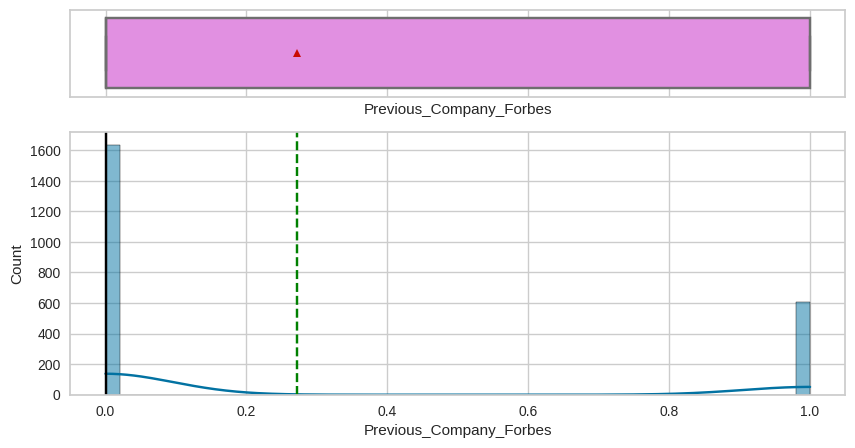

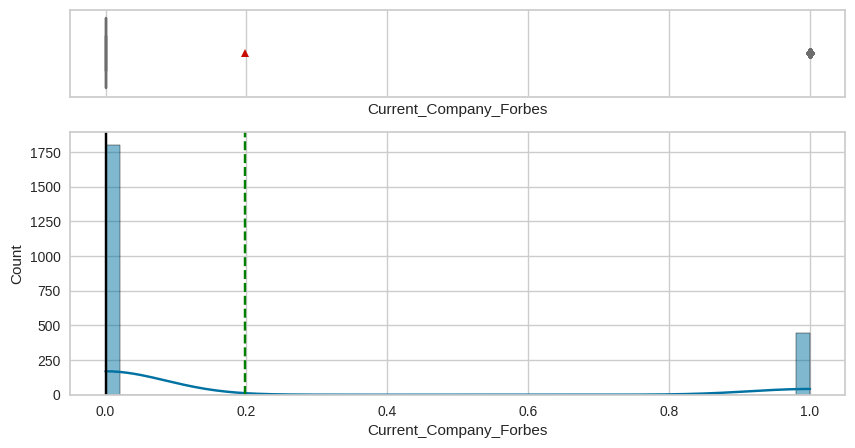

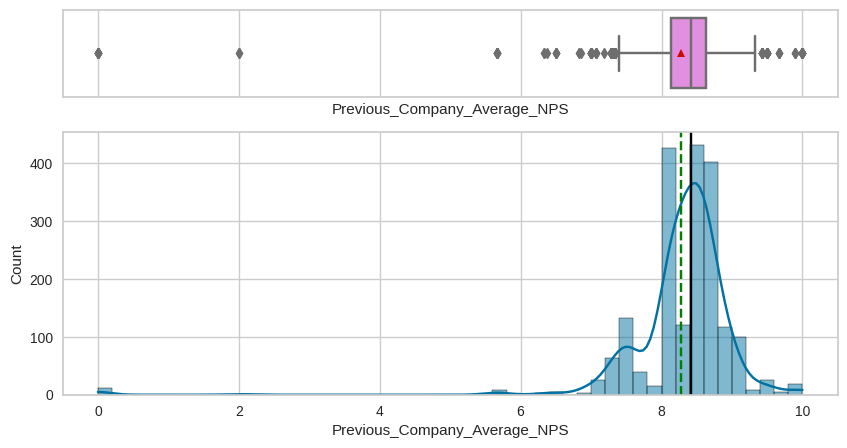

In [ ]:
# selecting numerical columns
num_cols = data_EDA.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

**3.1** **UNIVARITY ANALYZES**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data:    dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
num_cols

['LinkedIn_Follower_Count',
 'Linkedin_Connection_Count',
 'Previous_Company_Employess_On_Linkedin',
 'Previous_Company_Followers',
 'Previous_Company_Parent_Cmp_exist',
 'Current_Company_Employess_On_Linkedin',
 'Current_Company_Followers',
 'Current_Company_Rev',
 'Current_Company_Parent_Cmp_exist',
 'Engegement_Cnt_Epam',
 'Communication_intensity',
 'First_engagement_year',
 'Engagement_Duration_Epam',
 'Engegement_Cnt_Epam_C_track_CommIntens',
 'Engegement_Cnt_Epam_C_track',
 'Previous_Company_Forbes',
 'Current_Company_Forbes',
 'Previous_Company_Average_NPS']

3.1.1 **LinkedIn Follower Count**

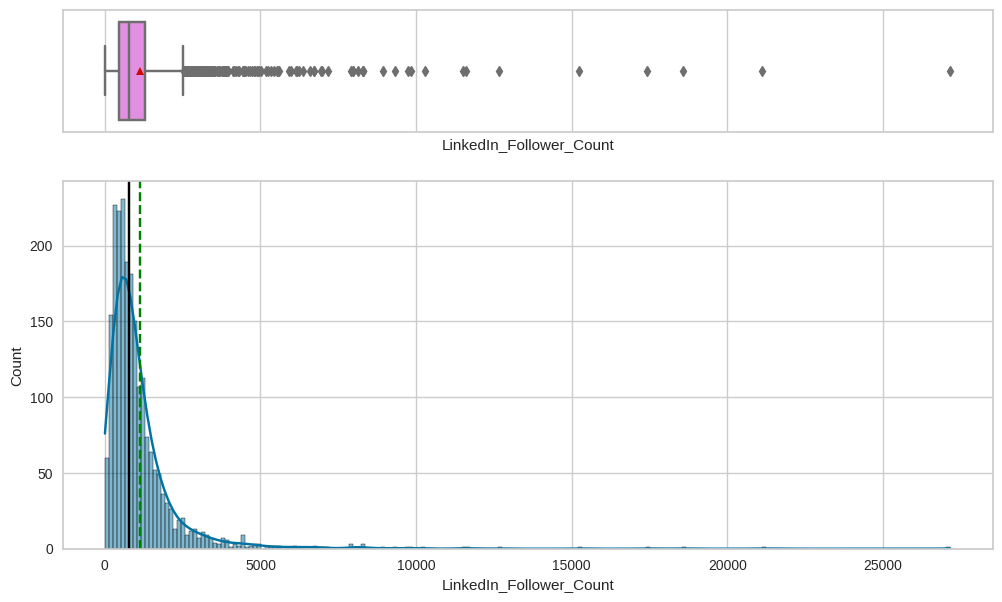

In [ ]:
histogram_boxplot(data_EDA,"LinkedIn_Follower_Count",kde=True)

In [ ]:
data_EDA["LinkedIn_Follower_Count"].mean()

1130.0733056708161

In [ ]:
data_EDA["LinkedIn_Follower_Count"].median()

777.0

3.1.2 **LinkedIn Connection Count**

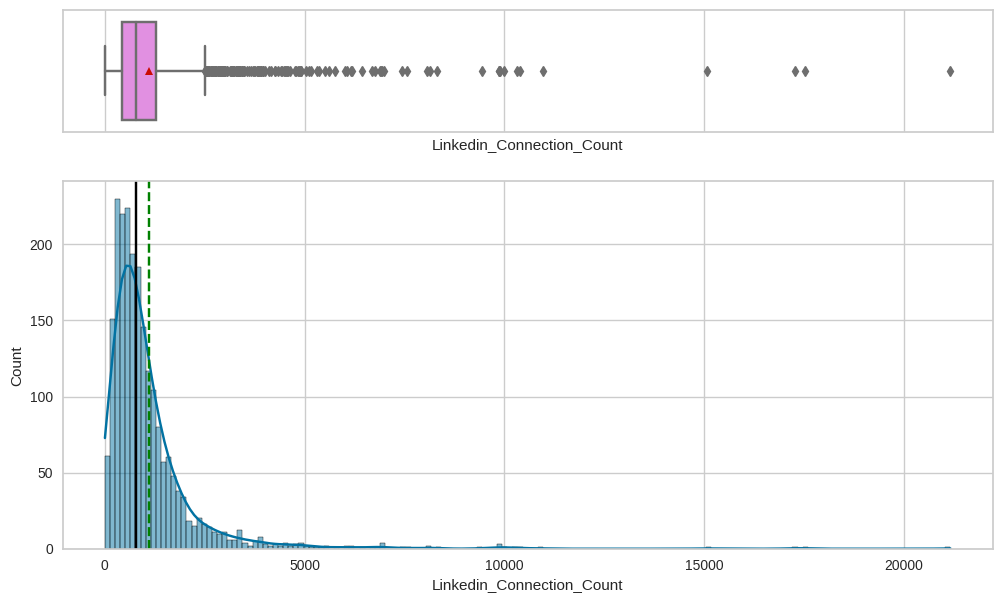

In [ ]:
histogram_boxplot(data_EDA,"Linkedin_Connection_Count",kde=True)

In [ ]:
data_EDA["Linkedin_Connection_Count"].mean()

1096.7031394275161

In [ ]:
data_EDA["Linkedin_Connection_Count"].median()

770.0

3.1.3 **Previous_Company_Employess_On_Linkedin**

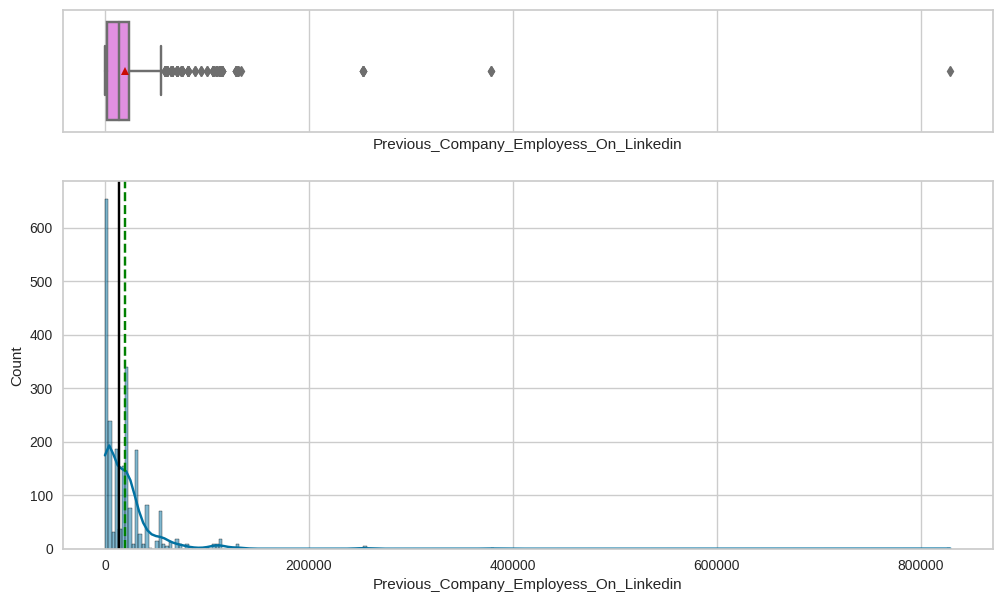

In [ ]:
histogram_boxplot(data_EDA,"Previous_Company_Employess_On_Linkedin",kde=True)

In [ ]:
data_EDA["Previous_Company_Employess_On_Linkedin"].mean()

20048.357589285715

In [ ]:
data_EDA["Previous_Company_Employess_On_Linkedin"].median()

13524.0

3.1.3 **Previous_Company_Followers**

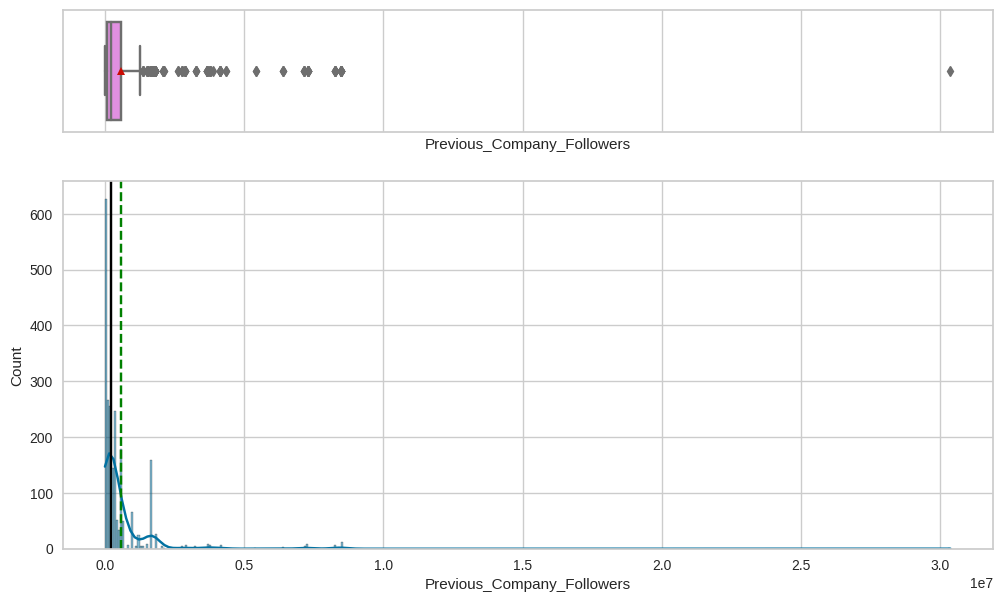

In [ ]:
histogram_boxplot(data_EDA,"Previous_Company_Followers",kde=True)

In [ ]:
data_EDA["Previous_Company_Followers"].mean()

579077.3672467648

In [ ]:
data_EDA["Previous_Company_Followers"].median()

229484.0

3.1.4 **Current_Company_Employess_On_Linkedin**

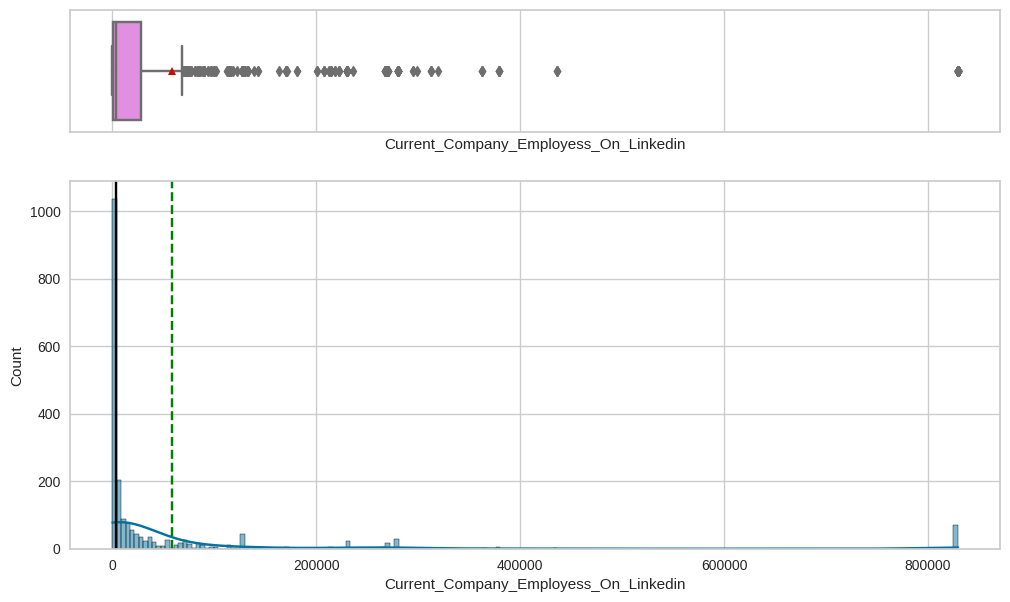

In [ ]:
histogram_boxplot(data_EDA,"Current_Company_Employess_On_Linkedin",kde=True)

In [ ]:
data_EDA["Current_Company_Employess_On_Linkedin"].mean()

58525.386060306475

In [ ]:
data_EDA["Current_Company_Employess_On_Linkedin"].median()

3906.0

3.1.5 **Current_Company_Followers**

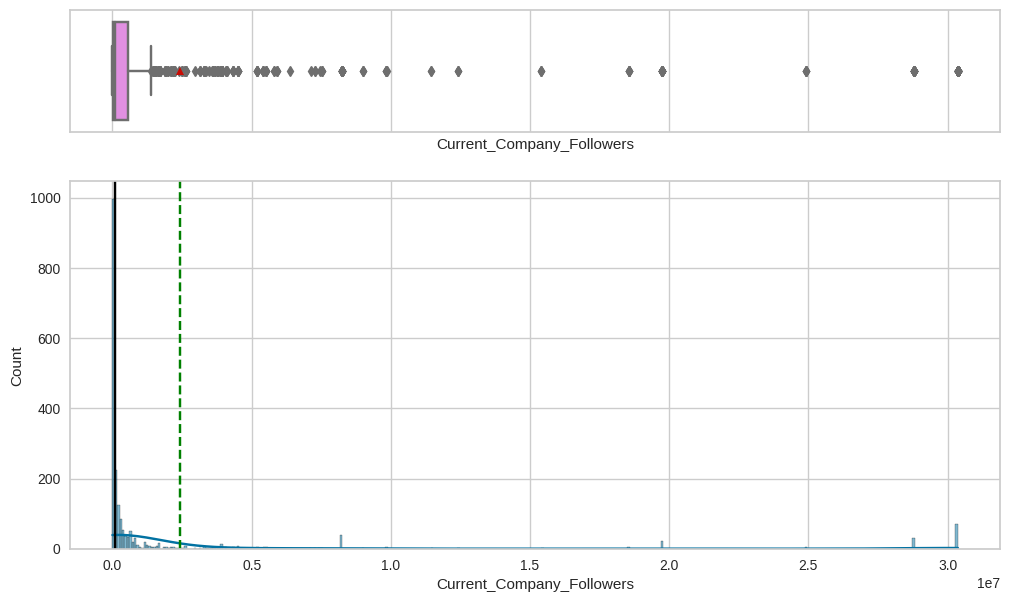

In [ ]:
histogram_boxplot(data_EDA,"Current_Company_Followers",kde=True)

In [ ]:
data_EDA["Current_Company_Followers"].mean()

2423790.744639376

In [ ]:
data_EDA["Current_Company_Followers"].median()

98110.5

3.1.5 **Engegement_Cnt_Epam**

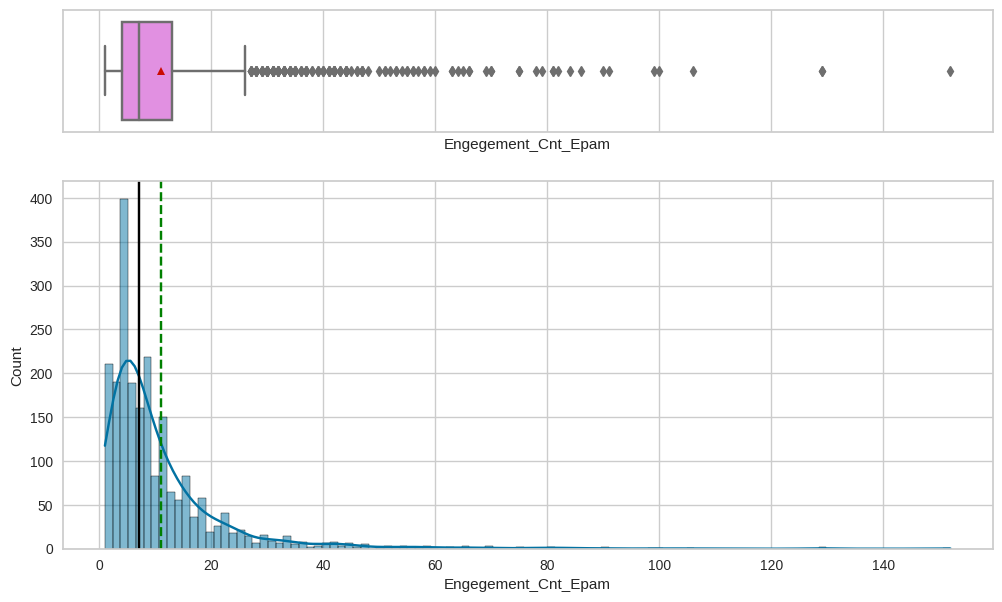

In [ ]:
histogram_boxplot(data_EDA,"Engegement_Cnt_Epam",kde=True)

In [ ]:
data_EDA["Engegement_Cnt_Epam"].mean()

10.952795600366636

In [ ]:
data_EDA["Engegement_Cnt_Epam"].median()

7.0

3.1.6 **Communication_intensity**

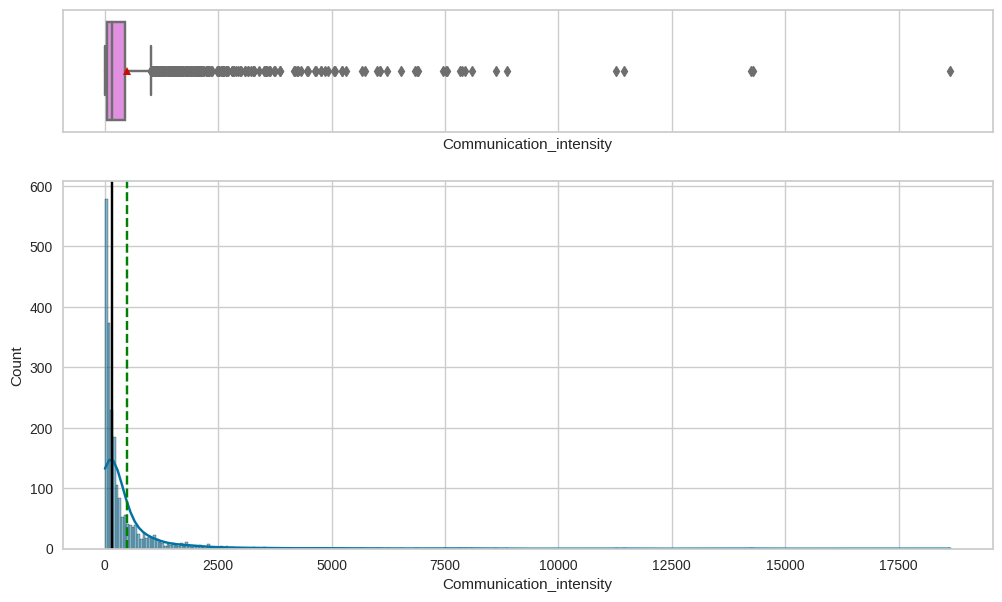

In [ ]:
histogram_boxplot(data_EDA,"Communication_intensity",kde=True)

In [ ]:
data_EDA["Communication_intensity"].mean()

494.7571035747021

In [ ]:
data_EDA["Communication_intensity"].median()

154.5

3.1.7 **First Engagement Year**

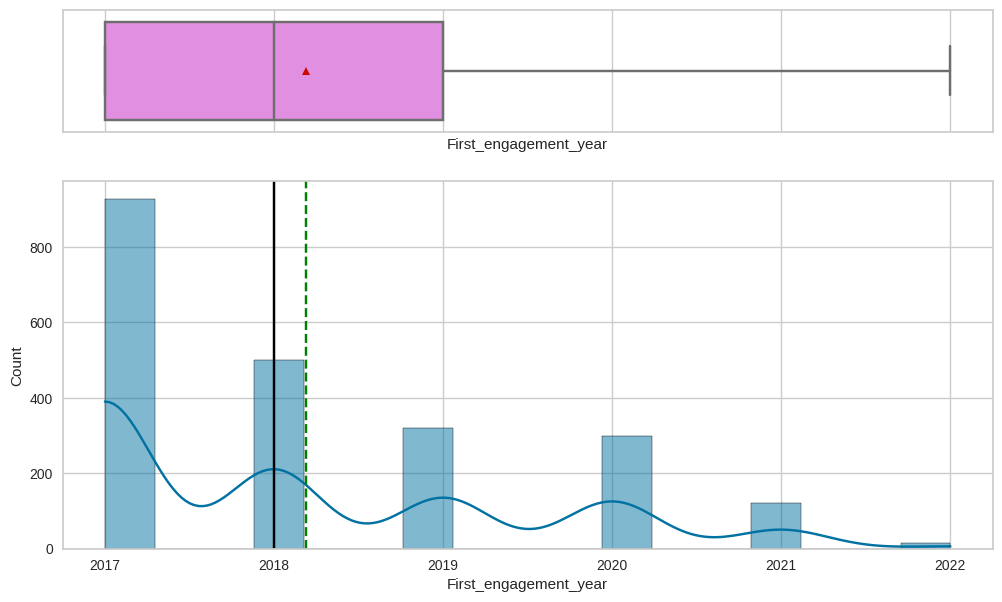

In [ ]:
histogram_boxplot(data_EDA,"First_engagement_year",kde=True)

In [ ]:
data_EDA["First_engagement_year"].mean()

2018.1874427131072

In [ ]:
data_EDA["First_engagement_year"].mean()

2018.1874427131072

3.1.8 **Engagement_Duration_Epam**

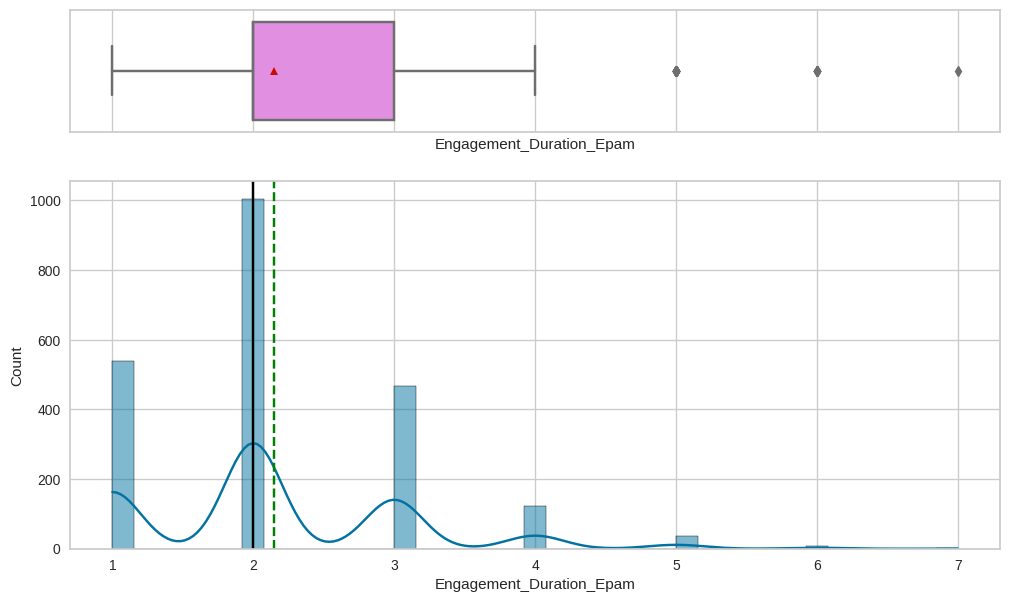

In [ ]:
histogram_boxplot(data_EDA,"Engagement_Duration_Epam",kde=True)

In [ ]:
data.head()

LinkedIn_Profile  LinkedIn_Follower_Count  \
0              https://www.linkedin.com/in/bajjarapu                   1210.0   
1  https://www.linkedin.com/in/youssef-ismaili-93...                   1119.0   
2  https://www.linkedin.com/in/carlos-pinzon-4643...                    742.0   
3   https://www.linkedin.com/in/kat-ashford-87383222                    642.0   
4   https://www.linkedin.com/in/usha-karnala-966120a                    810.0   

   Linkedin_Connection_Count         Full_Name  \
0                     1220.0  Bhaskar Ajjarapu   
1                     1126.0   Youssef Ismaili   
2                      732.0     Carlos Pinzon   
3                      629.0       Kat Ashford   
4                      808.0      Usha Karnala   

                   Searched_Email Previous_Seniority_Level  \
0    bhaskar.ajjarapu@equifax.com                        C   
1     youssef.ismaili@equifax.com                        C   
2  carlos.pinzonpinto@equifax.com                        B   
3   katherine.ashford@equifax.com                        C   
4        usha.karnala@equifax.com                        B   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       A          Equifax                10001+   
3                       C          Equifax                10001+   
4                       B          Equifax                10001+   

   Previous_Company_Employess_On_Linkedin  Previous_Company_Followers  \
0                                 14124.0                    173891.0   
1                                 14124.0                    173891.0   
2                                 14124.0                    173891.0   
3                                 14124.0                    173891.0   
4                                 14124.0                    173891.0   

   Previous_Company_Parent_Cmp_exist      Current_Company  \
0                                  0              Shopify   
1                                  0               Amazon   
2                                  0            Microsoft   
3                                  0  Centene Corporation   
4                                  0        Floor & Decor   

  Current_Company_Size  Current_Company_Employess_On_Linkedin  \
0               10001+                                16747.0   
1               10001+                               829209.0   
2               10001+                               230503.0   
3               10001+                                28158.0   
4           5001-10000                                 5238.0   

   Current_Company_Followers  Current_Company_Rev  \
0                   713684.0               4611.9   
1                 30368165.0             469822.0   
2                 19735748.0             198270.0   
3                   196232.0              74000.0   
4                    45063.0               3433.5   

   Current_Company_Parent_Cmp_exist  Engegement_Cnt_Epam  \
0                                 0                  2.0   
1                                 0                  7.0   
2                                 0                  9.0   
3                                 0                 14.0   
4                                 0                 24.0   

   Communication_intensity  First_engagement_year  Engagement_Duration_Epam  \
0                     13.0                 2019.0                       1.0   
1                     55.0                 2019.0                       1.0   
2                    179.0                 2019.0                       1.0   
3                    402.0                 2019.0                       1.0   
4                   1892.0                 2020.0                       2.0   

  Seniority_Level_Of_Epam  Engegement_Cnt_Epam_C_track_CommIntens  \
0                       C                    

In [ ]:
data_EDA["Engagement_Duration_Epam"].mean()

2.149404216315307

In [ ]:
data_EDA["Engagement_Duration_Epam"].median()

2.0

3.1.9 **Engegement_Cnt_Epam_C_track_CommIntens**

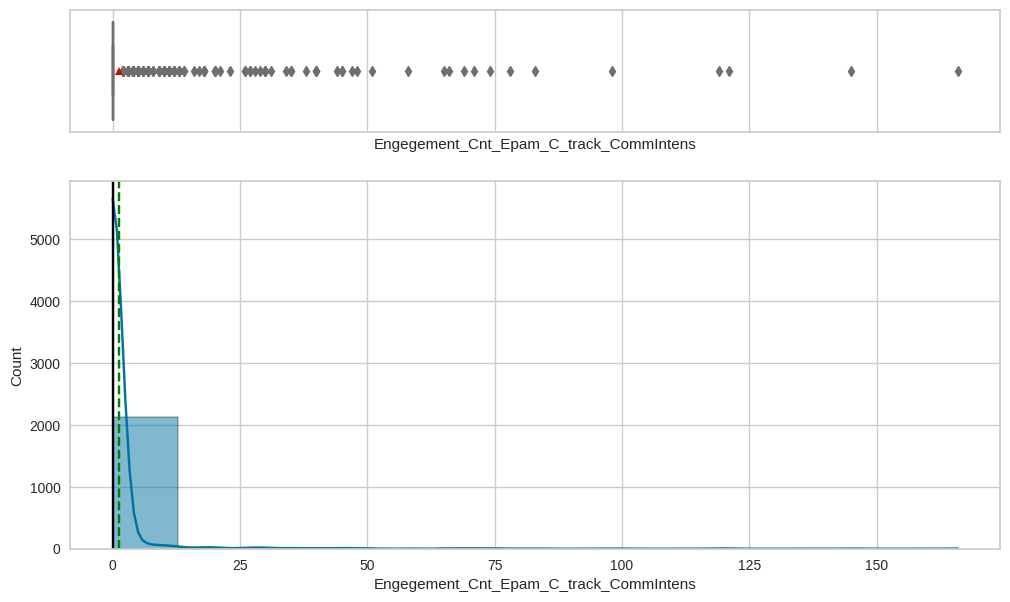

In [ ]:
histogram_boxplot(data_EDA,"Engegement_Cnt_Epam_C_track_CommIntens",kde=True)

In [ ]:
data_EDA["Engegement_Cnt_Epam_C_track_CommIntens"].mean()

1.274518790100825

In [ ]:
data_EDA["Engegement_Cnt_Epam_C_track_CommIntens"].median()

0.0

3.1.10 **Engegement_Cnt_Epam_C_track**

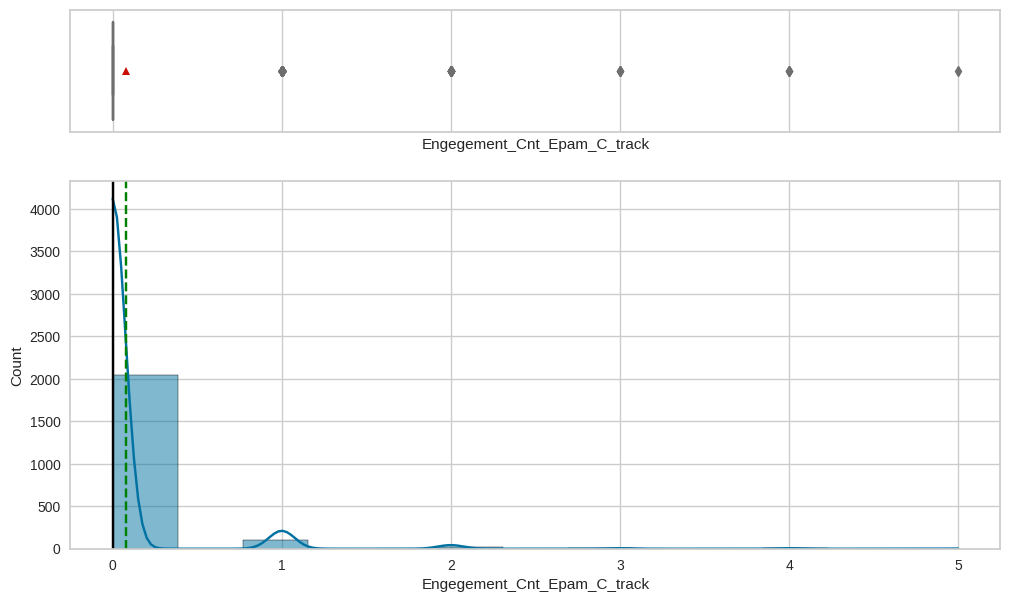

In [ ]:
histogram_boxplot(data_EDA,"Engegement_Cnt_Epam_C_track",kde=True)

In [ ]:
data_EDA["Engegement_Cnt_Epam_C_track"].mean()

0.07928505957836847

In [ ]:
data_EDA["Engegement_Cnt_Epam_C_track"].median()

0.0

3.1.11 **Current_Company_Forbes**

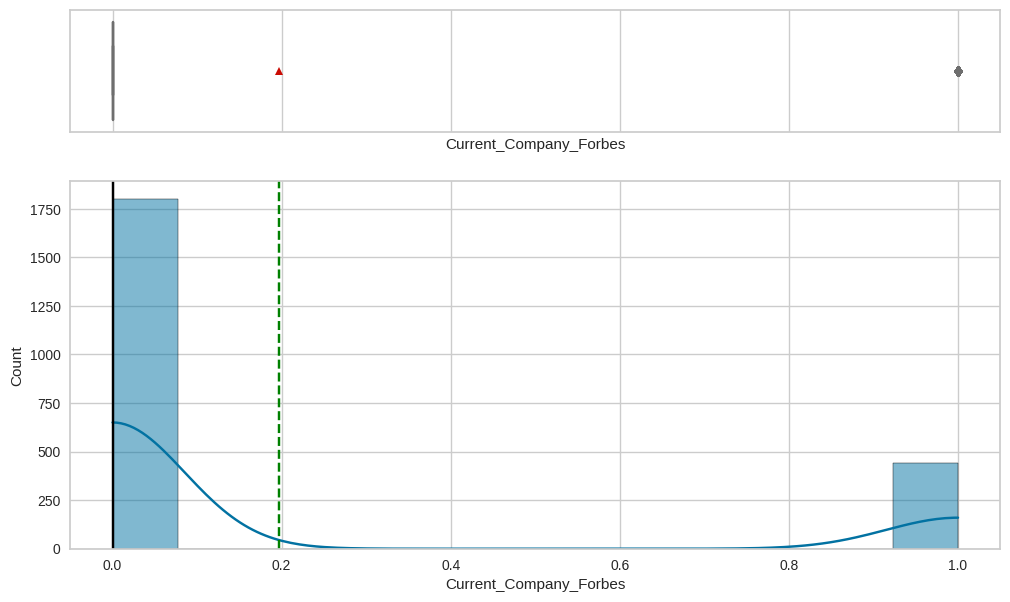

In [ ]:
histogram_boxplot(data_EDA,"Current_Company_Forbes",kde=True)

In [ ]:
data_EDA["Current_Company_Forbes"].mean()

0.1973273942093541

In [ ]:
data_EDA["Current_Company_Forbes"].median()

0.0

In [ ]:
data_EDA.head()

LinkedIn_Profile  LinkedIn_Follower_Count  \
0              https://www.linkedin.com/in/bajjarapu                   1210.0   
1  https://www.linkedin.com/in/youssef-ismaili-93...                   1119.0   
2  https://www.linkedin.com/in/carlos-pinzon-4643...                    742.0   
3   https://www.linkedin.com/in/kat-ashford-87383222                    642.0   
4   https://www.linkedin.com/in/usha-karnala-966120a                    810.0   

   Linkedin_Connection_Count         Full_Name  \
0                     1220.0  Bhaskar Ajjarapu   
1                     1126.0   Youssef Ismaili   
2                      732.0     Carlos Pinzon   
3                      629.0       Kat Ashford   
4                      808.0      Usha Karnala   

                   Searched_Email Previous_Seniority_Level  \
0    bhaskar.ajjarapu@equifax.com                        C   
1     youssef.ismaili@equifax.com                        C   
2  carlos.pinzonpinto@equifax.com                        B   
3   katherine.ashford@equifax.com                        C   
4        usha.karnala@equifax.com                        B   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       A          Equifax                10001+   
3                       C          Equifax                10001+   
4                       B          Equifax                10001+   

   Previous_Company_Employess_On_Linkedin  Previous_Company_Followers  \
0                                 14124.0                    173891.0   
1                                 14124.0                    173891.0   
2                                 14124.0                    173891.0   
3                                 14124.0                    173891.0   
4                                 14124.0                    173891.0   

   Previous_Company_Parent_Cmp_exist      Current_Company  \
0                                  0              Shopify   
1                                  0               Amazon   
2                                  0            Microsoft   
3                                  0  Centene Corporation   
4                                  0        Floor & Decor   

  Current_Company_Size  Current_Company_Employess_On_Linkedin  \
0               10001+                                16747.0   
1               10001+                               829209.0   
2               10001+                               230503.0   
3               10001+                                28158.0   
4           5001-10000                                 5238.0   

   Current_Company_Followers  Current_Company_Rev  \
0                   713684.0               4611.9   
1                 30368165.0             469822.0   
2                 19735748.0             198270.0   
3                   196232.0              74000.0   
4                    45063.0               3433.5   

   Current_Company_Parent_Cmp_exist  Engegement_Cnt_Epam  \
0                                 0                  2.0   
1                                 0                  7.0   
2                                 0                  9.0   
3                                 0                 14.0   
4                                 0                 24.0   

   Communication_intensity  First_engagement_year  Engagement_Duration_Epam  \
0                     13.0                 2019.0                       1.0   
1                     55.0                 2019.0                       1.0   
2                    179.0                 2019.0                       1.0   
3                    402.0                 2019.0                       1.0   
4                   1892.0                 2020.0                       2.0   

  Seniority_Level_Of_Epam  Engegement_Cnt_Epam_C_track_CommIntens  \
0                       C                    

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**3.2** **BIVARIATE ANALYSIS**

In [ ]:
data_EDA.head()

LinkedIn_Profile  LinkedIn_Follower_Count  \
0              https://www.linkedin.com/in/bajjarapu                   1210.0   
1  https://www.linkedin.com/in/youssef-ismaili-93...                   1119.0   
2  https://www.linkedin.com/in/carlos-pinzon-4643...                    742.0   
3   https://www.linkedin.com/in/kat-ashford-87383222                    642.0   
4   https://www.linkedin.com/in/usha-karnala-966120a                    810.0   

   Linkedin_Connection_Count         Full_Name  \
0                     1220.0  Bhaskar Ajjarapu   
1                     1126.0   Youssef Ismaili   
2                      732.0     Carlos Pinzon   
3                      629.0       Kat Ashford   
4                      808.0      Usha Karnala   

                   Searched_Email Previous_Seniority_Level  \
0    bhaskar.ajjarapu@equifax.com                        C   
1     youssef.ismaili@equifax.com                        C   
2  carlos.pinzonpinto@equifax.com                        B   
3   katherine.ashford@equifax.com                        C   
4        usha.karnala@equifax.com                        B   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       A          Equifax                10001+   
3                       C          Equifax                10001+   
4                       B          Equifax                10001+   

   Previous_Company_Employess_On_Linkedin  Previous_Company_Followers  \
0                                 14124.0                    173891.0   
1                                 14124.0                    173891.0   
2                                 14124.0                    173891.0   
3                                 14124.0                    173891.0   
4                                 14124.0                    173891.0   

   Previous_Company_Parent_Cmp_exist      Current_Company  \
0                                  0              Shopify   
1                                  0               Amazon   
2                                  0            Microsoft   
3                                  0  Centene Corporation   
4                                  0        Floor & Decor   

  Current_Company_Size  Current_Company_Employess_On_Linkedin  \
0               10001+                                16747.0   
1               10001+                               829209.0   
2               10001+                               230503.0   
3               10001+                                28158.0   
4           5001-10000                                 5238.0   

   Current_Company_Followers  Current_Company_Rev  \
0                   713684.0               4611.9   
1                 30368165.0             469822.0   
2                 19735748.0             198270.0   
3                   196232.0              74000.0   
4                    45063.0               3433.5   

   Current_Company_Parent_Cmp_exist  Engegement_Cnt_Epam  \
0                                 0                  2.0   
1                                 0                  7.0   
2                                 0                  9.0   
3                                 0                 14.0   
4                                 0                 24.0   

   Communication_intensity  First_engagement_year  Engagement_Duration_Epam  \
0                     13.0                 2019.0                       1.0   
1                     55.0                 2019.0                       1.0   
2                    179.0                 2019.0                       1.0   
3                    402.0                 2019.0                       1.0   
4                   1892.0                 2020.0                       2.0   

  Seniority_Level_Of_Epam  Engegement_Cnt_Epam_C_track_CommIntens  \
0                       C                    

In [ ]:
data_heatmap=data_EDA

In [ ]:
data_heatmap = data_heatmap.drop(["Previous_Company_Parent_Cmp_exist"], axis=1)

In [ ]:
data_heatmap

LinkedIn_Profile  \
0                 https://www.linkedin.com/in/bajjarapu   
1     https://www.linkedin.com/in/youssef-ismaili-93...   
2     https://www.linkedin.com/in/carlos-pinzon-4643...   
3      https://www.linkedin.com/in/kat-ashford-87383222   
4      https://www.linkedin.com/in/usha-karnala-966120a   
...                                                 ...   
2240  https://www.linkedin.com/in/brian-tehako-38002...   
2241  https://www.linkedin.com/in/brian-byars-24954b59/   
2242  https://www.linkedin.com/in/daliya-asuma-7632046/   
2243        https://www.linkedin.com/in/justindaleiden/   
2244              https://www.linkedin.com/in/ralrayes/   

      LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                      1210.0                     1220.0  Bhaskar Ajjarapu   
1                      1119.0                     1126.0   Youssef Ismaili   
2                       742.0                      732.0     Carlos Pinzon   
3                       642.0                      629.0       Kat Ashford   
4                       810.0                      808.0      Usha Karnala   
...                       ...                        ...               ...   
2240                  18573.0                    17510.0      Brian Tehako   
2241                    348.0                      349.0       Brian Byars   
2242                    608.0                      612.0      Daliya Asuma   
2243                    890.0                      889.0   Justin Daleiden   
2244                    985.0                      993.0      Rima AlRayes   

                           Searched_Email Previous_Seniority_Level  \
0            bhaskar.ajjarapu@equifax.com                        C   
1             youssef.ismaili@equifax.com                        C   
2          carlos.pinzonpinto@equifax.com                        B   
3           katherine.ashford@equifax.com                        C   
4                usha.karnala@equifax.com                        B   
...                                   ...                      ...   
2240                 btehako@hehmeyer.com                        C   
2241                brian.byars@hilti.com                        A   
2242               daliya.asuma@hilti.com                        A   
2243  justin.daleiden@externals.hilti.com                        B   
2244               rima.alrayes@hilti.com                        B   

     Current_Seniority_Level     Previous_Company Previous_Company_Size  \
0                          A              Equifax                10001+   
1                          C              Equifax                10001+   
2                          A              Equifax                10001+   
3                          C              Equifax                10001+   
4                          B              Equifax                10001+   
...                      ...                  ...                   ...   
2240                       C             Hehmeyer                 Other   
2241                   Other  Hilti North America             1001-5000   
2242                       A  Hilti North America             1001-5000   
2243                       A  Hilti North America             1001-5000   
2244                       B  Hilti North America             1001-5000   

      Previous_Company_Employess_On_Linkedin  Previous_Company_Followers  \
0                                    14124.0                    173891.0   
1                                    14124.0                    173891.0   
2                                    14124.0                    173891.0   
3                                    14124.0                    173891.0   
4                                    14124.0                    173891.0   
...                                      ...                         ...   
2240                                     NaN                         NaN   
2241                                  2948.

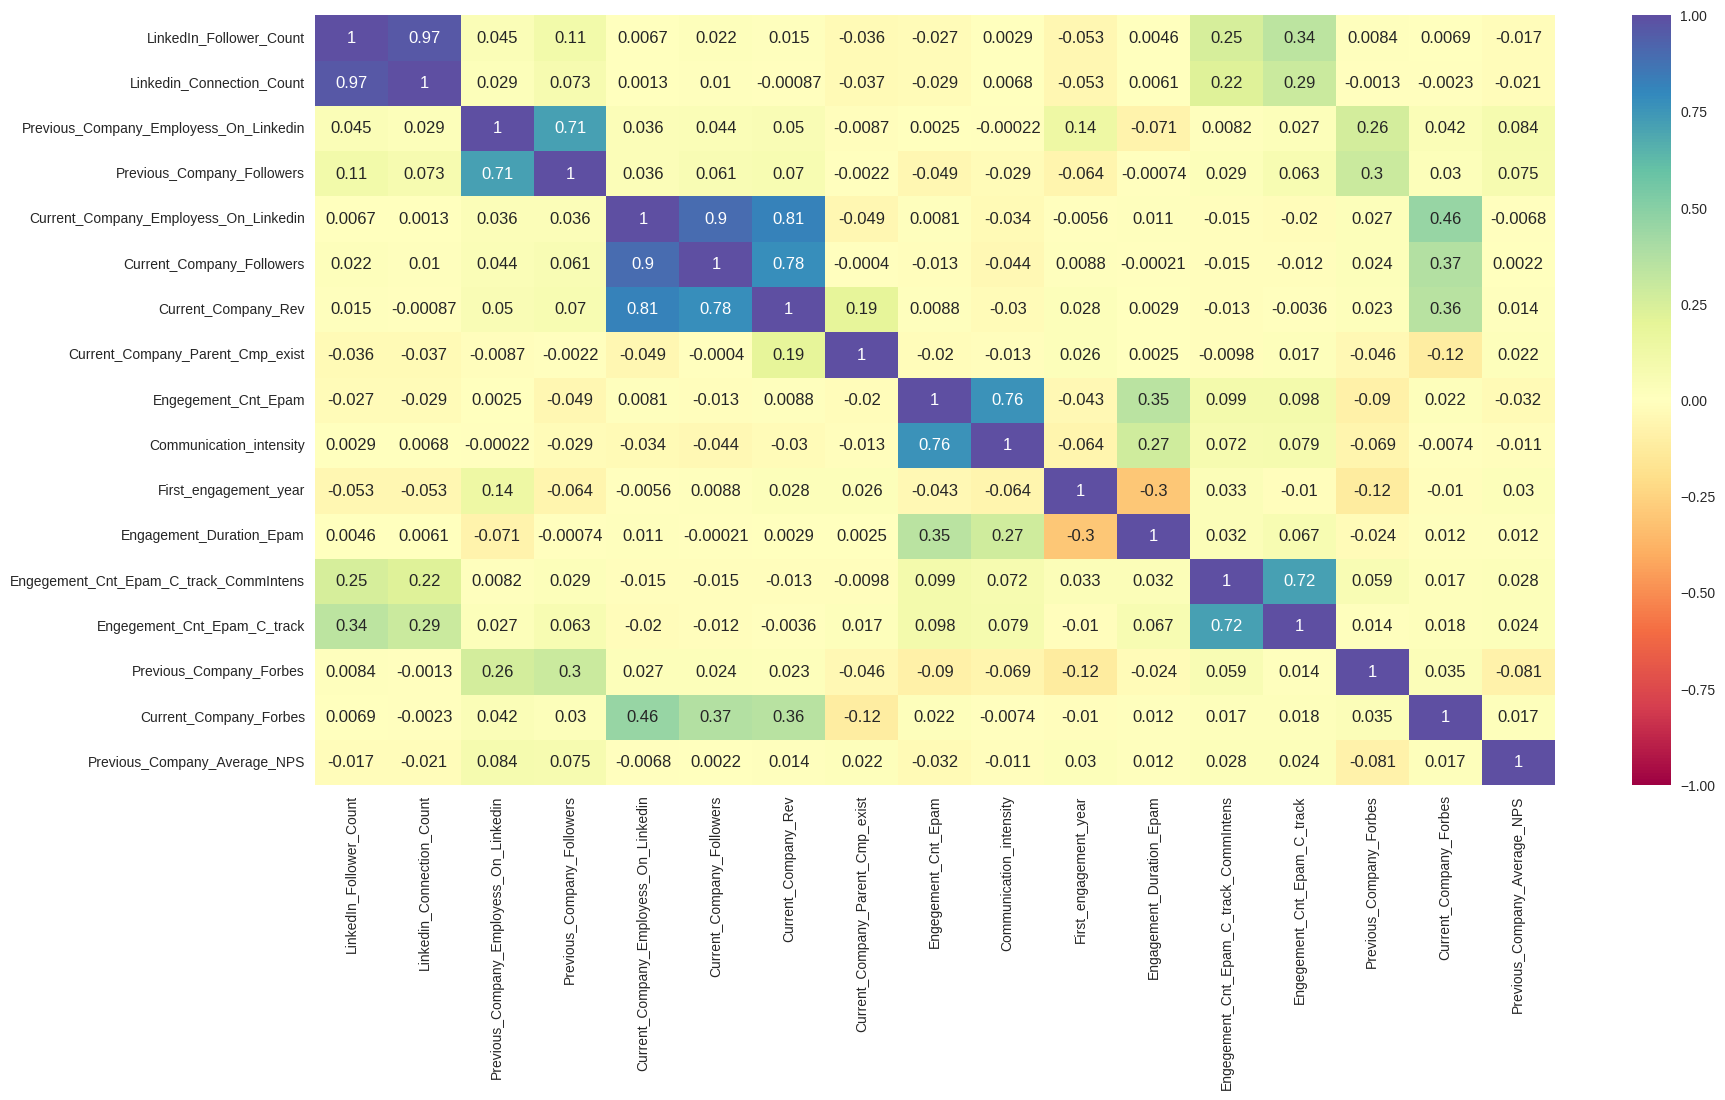

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data_heatmap.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**OBSERVATIONS**















**Differentiating Numerical Columns**

In [ ]:
numeric_cols = data_EDA.select_dtypes(include=[np.number]).columns

print("Numeric Columns:    ", numeric_cols)

Numeric Columns:     Index(['LinkedIn_Follower_Count', 'Linkedin_Connection_Count',
       'Previous_Company_Employess_On_Linkedin', 'Previous_Company_Followers',
       'Previous_Company_Parent_Cmp_exist',
       'Current_Company_Employess_On_Linkedin', 'Current_Company_Followers',
       'Current_Company_Rev', 'Current_Company_Parent_Cmp_exist',
       'Engegement_Cnt_Epam', 'Communication_intensity',
       'First_engagement_year', 'Engagement_Duration_Epam',
       'Engegement_Cnt_Epam_C_track_CommIntens', 'Engegement_Cnt_Epam_C_track',
       'Previous_Company_Forbes', 'Current_Company_Forbes',
       'Previous_Company_Average_NPS'],
      dtype='object')


In [ ]:

data_EDA.groupby(["First_engagement_year"])[numeric_cols].mean()

LinkedIn_Follower_Count  Linkedin_Connection_Count  \
First_engagement_year                                                       
2017.0                             1161.124444                1119.302222   
2018.0                             1167.507246                1140.155602   
2019.0                             1130.766234                1094.740260   
2020.0                              871.324042                 856.062937   
2021.0                             1070.095652                1054.964912   
2022.0                              885.857143                 864.071429   

                       Previous_Company_Employess_On_Linkedin  \
First_engagement_year                                           
2017.0                                           17055.757543   
2018.0                                           18121.456000   
2019.0                                           17364.065625   
2020.0                                           31102.280405   
2021.0                                           27531.372881   
2022.0                                           46179.600000   

                       Previous_Company_Followers  \
First_engagement_year                               
2017.0                              649841.795259   
2018.0                              635668.378000   
2019.0                              402699.295950   
2020.0                              527427.354730   
2021.0                              386919.347458   
2022.0                              430452.333333   

                       Previous_Company_Parent_Cmp_exist  \
First_engagement_year                                      
2017.0                                          0.185345   
2018.0                                          0.122000   
2019.0                                          0.099688   
2020.0                                          0.590604   
2021.0                                          0.625000   
2022.0                                          0.466667   

                       Current_Company_Employess_On_Linkedin  \
First_engagement_year                                          
2017.0                                          58435.288439   
2018.0                                          63573.464758   
2019.0                                          63861.266667   
2020.0                                          52556.849265   
2021.0                                          48058.037037   
2022.0                                         117151.000000   

                       Current_Company_Followers  Current_Company_Rev  \
First_engagement_year                                                   
2017.0                              2.310344e+06         39261.802119   
2018.0                              2.596839e+06         46236.910110   
2019.0                              2.857843e+06         46008.273005   
2020.0                              2.149872e+06         52424.112909   
2021.0                              2.386244e+06         37041.268232   
2022.0                              4.648802e+06         65483.222000   

                       Current_Company_Parent_Cmp_exist  Engegement_Cnt_Epam  \
First_engagement_year                                                          
2017.0                                         0.085129            12.011853   
2018.0                                         0.094000             9.628000   
2019.0                                         0.090343             9.071651   
2020.0                                         0.124161            13.345638   
2021.0                                         0.100000             8.050000   
2022.0                                         0.000000             5.533333   

                       Communication_intensity  First_engagement_year  \
First_engagement_year                                                   
2017.0                              590.701509                 2017.0   
2018.0               

**All Numerical Columns Analyzsis**

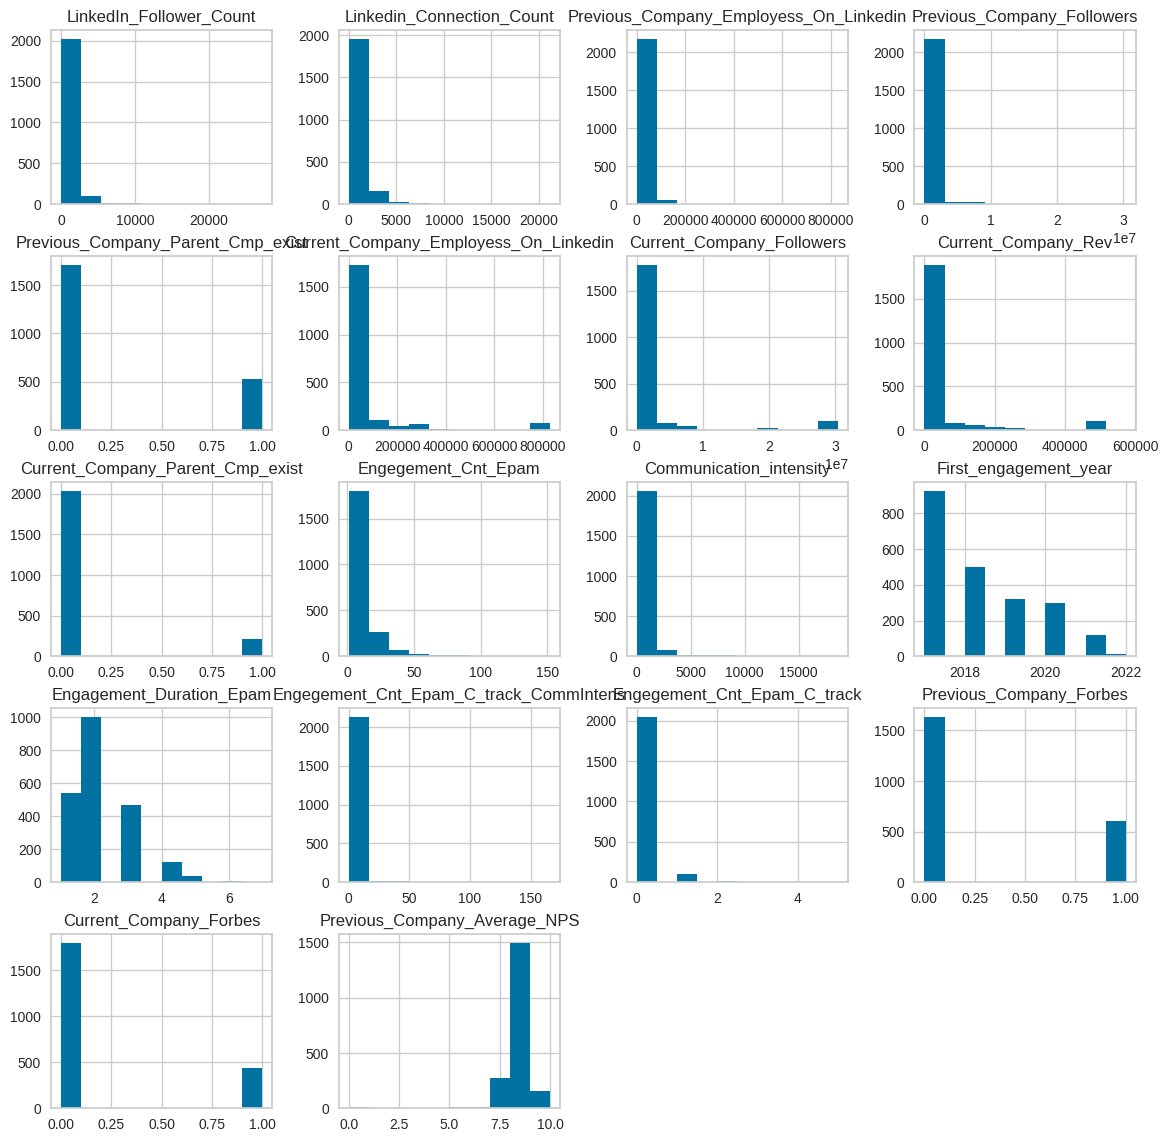

In [ ]:
data_EDA[numeric_cols].hist(figsize=(14, 14))
plt.show()

In [ ]:
data_EDA.head()

LinkedIn_Profile  LinkedIn_Follower_Count  \
0              https://www.linkedin.com/in/bajjarapu                   1210.0   
1  https://www.linkedin.com/in/youssef-ismaili-93...                   1119.0   
2  https://www.linkedin.com/in/carlos-pinzon-4643...                    742.0   
3   https://www.linkedin.com/in/kat-ashford-87383222                    642.0   
4   https://www.linkedin.com/in/usha-karnala-966120a                    810.0   

   Linkedin_Connection_Count         Full_Name  \
0                     1220.0  Bhaskar Ajjarapu   
1                     1126.0   Youssef Ismaili   
2                      732.0     Carlos Pinzon   
3                      629.0       Kat Ashford   
4                      808.0      Usha Karnala   

                   Searched_Email Previous_Seniority_Level  \
0    bhaskar.ajjarapu@equifax.com                        C   
1     youssef.ismaili@equifax.com                        C   
2  carlos.pinzonpinto@equifax.com                        B   
3   katherine.ashford@equifax.com                        C   
4        usha.karnala@equifax.com                        B   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       A          Equifax                10001+   
3                       C          Equifax                10001+   
4                       B          Equifax                10001+   

   Previous_Company_Employess_On_Linkedin  Previous_Company_Followers  \
0                                 14124.0                    173891.0   
1                                 14124.0                    173891.0   
2                                 14124.0                    173891.0   
3                                 14124.0                    173891.0   
4                                 14124.0                    173891.0   

   Previous_Company_Parent_Cmp_exist      Current_Company  \
0                                  0              Shopify   
1                                  0               Amazon   
2                                  0            Microsoft   
3                                  0  Centene Corporation   
4                                  0        Floor & Decor   

  Current_Company_Size  Current_Company_Employess_On_Linkedin  \
0               10001+                                16747.0   
1               10001+                               829209.0   
2               10001+                               230503.0   
3               10001+                                28158.0   
4           5001-10000                                 5238.0   

   Current_Company_Followers  Current_Company_Rev  \
0                   713684.0               4611.9   
1                 30368165.0             469822.0   
2                 19735748.0             198270.0   
3                   196232.0              74000.0   
4                    45063.0               3433.5   

   Current_Company_Parent_Cmp_exist  Engegement_Cnt_Epam  \
0                                 0                  2.0   
1                                 0                  7.0   
2                                 0                  9.0   
3                                 0                 14.0   
4                                 0                 24.0   

   Communication_intensity  First_engagement_year  Engagement_Duration_Epam  \
0                     13.0                 2019.0                       1.0   
1                     55.0                 2019.0                       1.0   
2                    179.0                 2019.0                       1.0   
3                    402.0                 2019.0                       1.0   
4                   1892.0                 2020.0                       2.0   

  Seniority_Level_Of_Epam  Engegement_Cnt_Epam_C_track_CommIntens  \
0                       C                    

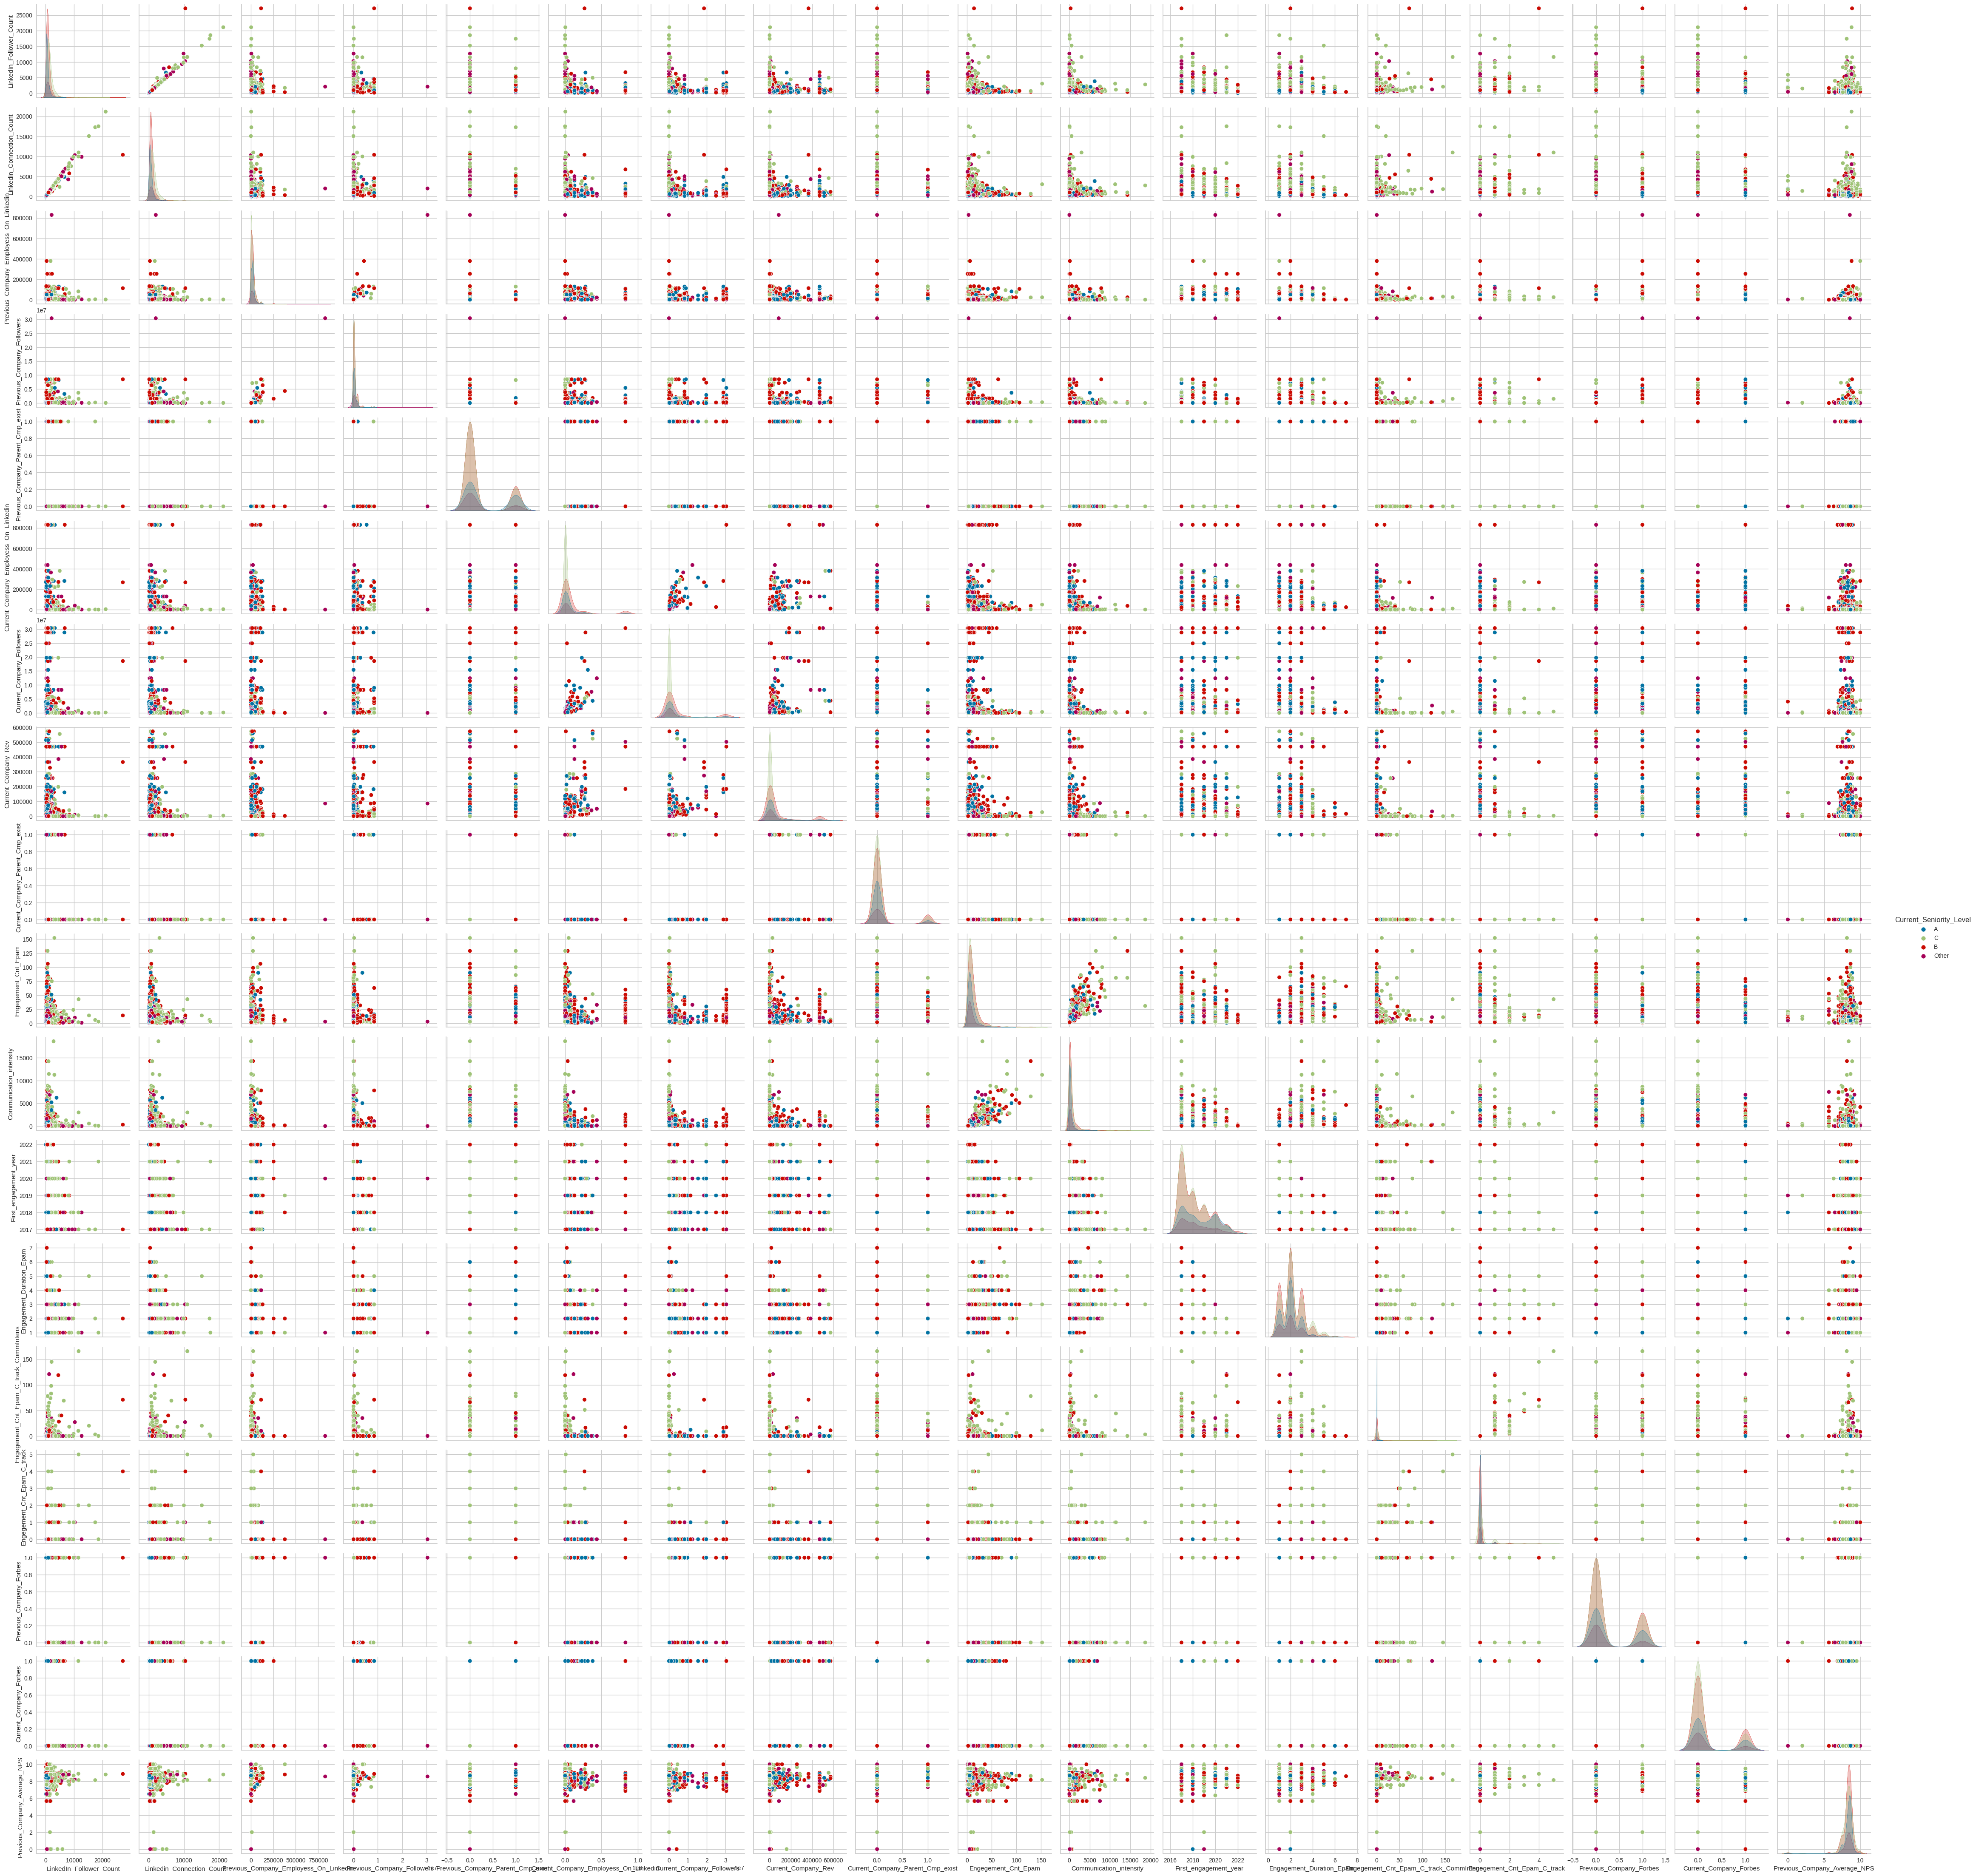

In [ ]:
sns.pairplot(data=data_EDA,hue="Current_Seniority_Level", diag_kind="kde")
plt.show()

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
data_EDA.head()

LinkedIn_Profile  LinkedIn_Follower_Count  \
0              https://www.linkedin.com/in/bajjarapu                   1210.0   
1  https://www.linkedin.com/in/youssef-ismaili-93...                   1119.0   
2  https://www.linkedin.com/in/carlos-pinzon-4643...                    742.0   
3   https://www.linkedin.com/in/kat-ashford-87383222                    642.0   
4   https://www.linkedin.com/in/usha-karnala-966120a                    810.0   

   Linkedin_Connection_Count         Full_Name  \
0                     1220.0  Bhaskar Ajjarapu   
1                     1126.0   Youssef Ismaili   
2                      732.0     Carlos Pinzon   
3                      629.0       Kat Ashford   
4                      808.0      Usha Karnala   

                   Searched_Email Previous_Seniority_Level  \
0    bhaskar.ajjarapu@equifax.com                        C   
1     youssef.ismaili@equifax.com                        C   
2  carlos.pinzonpinto@equifax.com                        B   
3   katherine.ashford@equifax.com                        C   
4        usha.karnala@equifax.com                        B   

  Current_Seniority_Level Previous_Company Previous_Company_Size  \
0                       A          Equifax                10001+   
1                       C          Equifax                10001+   
2                       A          Equifax                10001+   
3                       C          Equifax                10001+   
4                       B          Equifax                10001+   

   Previous_Company_Employess_On_Linkedin  Previous_Company_Followers  \
0                                 14124.0                    173891.0   
1                                 14124.0                    173891.0   
2                                 14124.0                    173891.0   
3                                 14124.0                    173891.0   
4                                 14124.0                    173891.0   

   Previous_Company_Parent_Cmp_exist      Current_Company  \
0                                  0              Shopify   
1                                  0               Amazon   
2                                  0            Microsoft   
3                                  0  Centene Corporation   
4                                  0        Floor & Decor   

  Current_Company_Size  Current_Company_Employess_On_Linkedin  \
0               10001+                                16747.0   
1               10001+                               829209.0   
2               10001+                               230503.0   
3               10001+                                28158.0   
4           5001-10000                                 5238.0   

   Current_Company_Followers  Current_Company_Rev  \
0                   713684.0               4611.9   
1                 30368165.0             469822.0   
2                 19735748.0             198270.0   
3                   196232.0              74000.0   
4                    45063.0               3433.5   

   Current_Company_Parent_Cmp_exist  Engegement_Cnt_Epam  \
0                                 0                  2.0   
1                                 0                  7.0   
2                                 0                  9.0   
3                                 0                 14.0   
4                                 0                 24.0   

   Communication_intensity  First_engagement_year  Engagement_Duration_Epam  \
0                     13.0                 2019.0                       1.0   
1                     55.0                 2019.0                       1.0   
2                    179.0                 2019.0                       1.0   
3                    402.0                 2019.0                       1.0   
4                   1892.0                 2020.0                       2.0   

  Seniority_Level_Of_Epam  Engegement_Cnt_Epam_C_track_CommIntens  \
0                       C                    

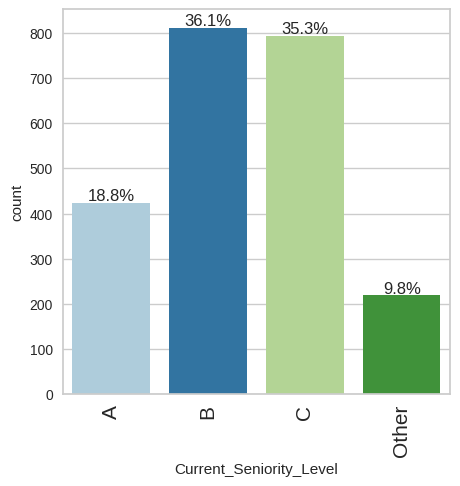

In [ ]:
labeled_barplot(data_EDA, "Current_Seniority_Level", perc=True)

**Current Company Size vrs Current Seniority**

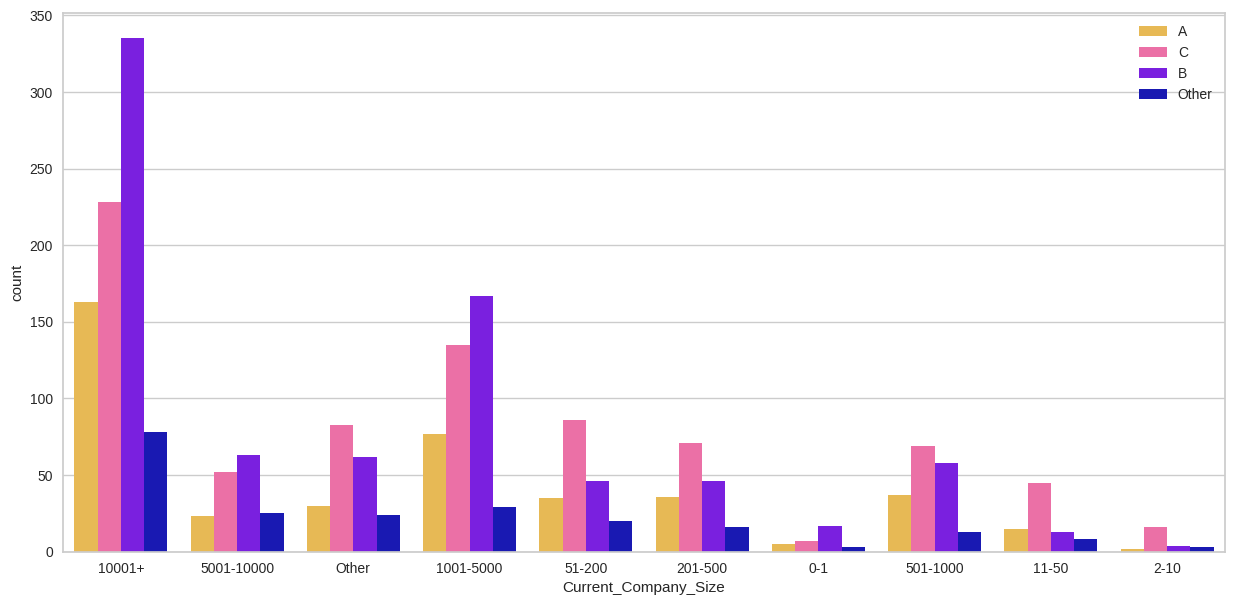

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Current_Company_Size"],hue=data_EDA["Current_Seniority_Level"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

In [ ]:
data_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LinkedIn_Profile                        2245 non-null   object 
 1   LinkedIn_Follower_Count                 2169 non-null   float64
 2   Linkedin_Connection_Count               2166 non-null   float64
 3   Full_Name                               2245 non-null   object 
 4   Searched_Email                          2245 non-null   object 
 5   Previous_Seniority_Level                2245 non-null   object 
 6   Current_Seniority_Level                 2245 non-null   object 
 7   Previous_Company                        2245 non-null   object 
 8   Previous_Company_Size                   2245 non-null   object 
 9   Previous_Company_Employess_On_Linkedin  2240 non-null   float64
 10  Previous_Company_Followers              2241 non-null   floa

Current Company Forbes vrs Engagement_Duration_Epam

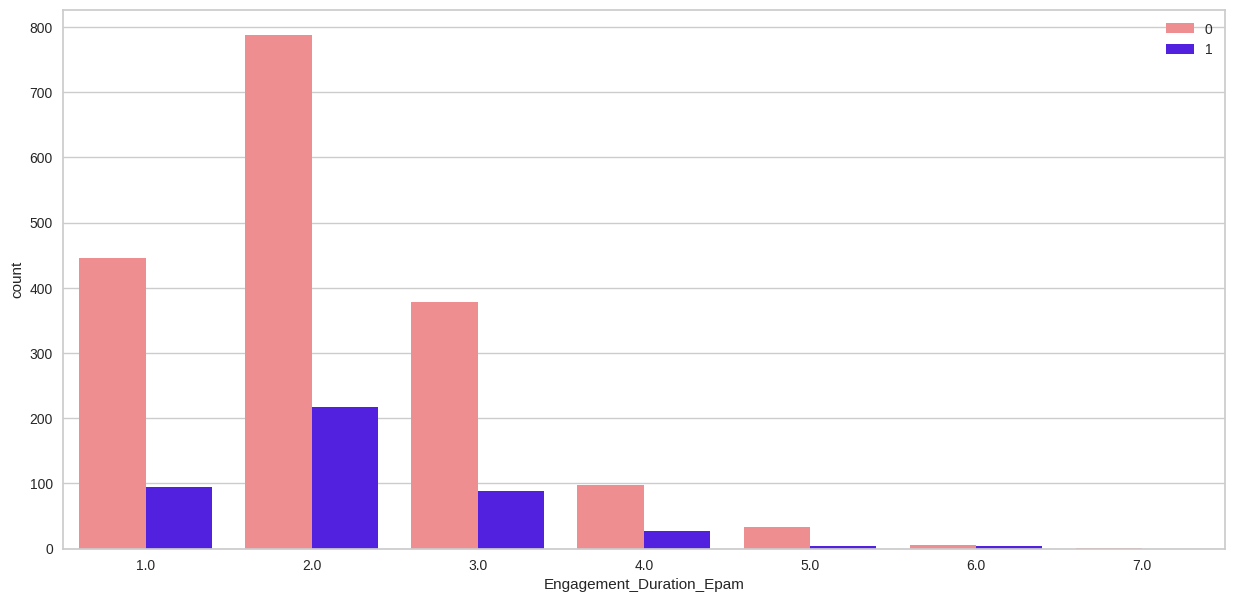

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Engagement_Duration_Epam"],hue=data_EDA["Current_Company_Forbes"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

Current Company Forbes vrs Current_Seniority_Level

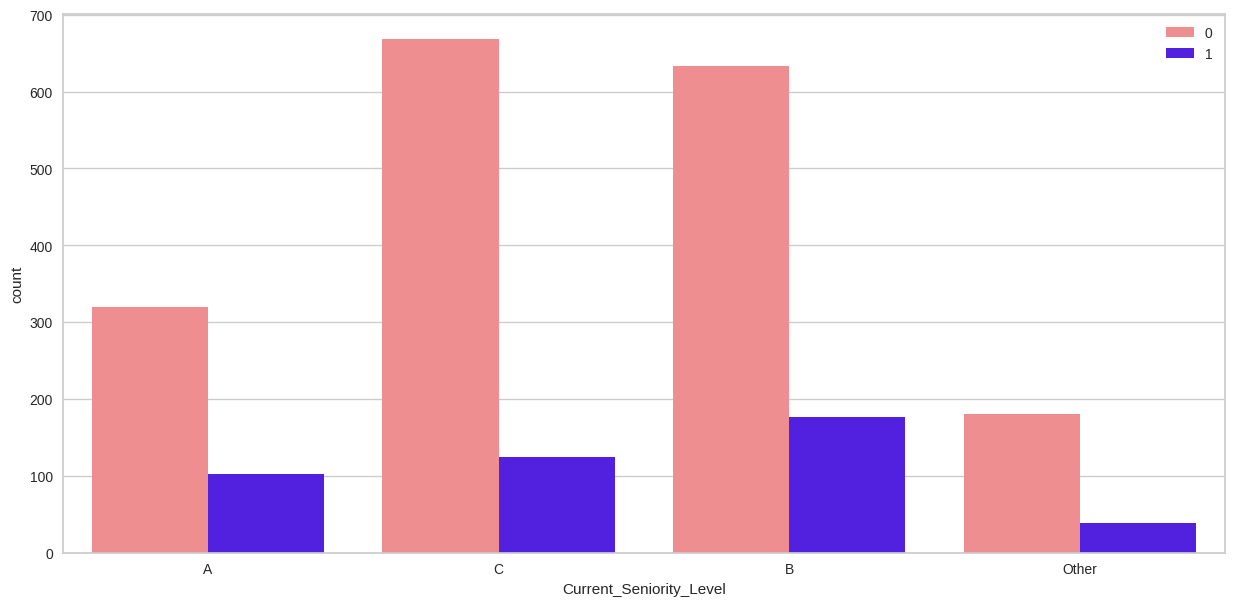

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_EDA, x = data_EDA["Current_Seniority_Level"],hue=data_EDA["Current_Company_Forbes"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

##4-DATA PREPROSESSING

Copying data_EDA to data_pre_process Data Frame for abstraction

In [ ]:
data_pre_process=data_EDA.copy()

In [ ]:
##def drop_empty_rows(df):
    # Calculate the threshold based on 10% of the total number of columns
#    threshold= round(df.isnull().sum() / df().count() * 100, 2)
    
    # Count the number of missing values in each row
#    row_missing_values = df.isnull().sum(axis=1)

    # Filter rows where the number of missing values is greater than the threshold
#    rows_to_drop = row_missing_values[row_missing_values > threshold].index

    # Drop the identified rows
#    df_dropped = df.drop(rows_to_drop)

#    return df_dropped

In [ ]:
round(data_pre_process.isnull().sum() / data_pre_process.isnull().count() * 100, 2)

LinkedIn_Profile                           0.00
LinkedIn_Follower_Count                    3.39
Linkedin_Connection_Count                  3.52
Full_Name                                  0.00
Searched_Email                             0.00
Previous_Seniority_Level                   0.00
Current_Seniority_Level                    0.00
Previous_Company                           0.00
Previous_Company_Size                      0.00
Previous_Company_Employess_On_Linkedin     0.22
Previous_Company_Followers                 0.18
Previous_Company_Parent_Cmp_exist          0.00
Current_Company                            0.00
Current_Company_Size                       0.00
Current_Company_Employess_On_Linkedin      9.89
Current_Company_Followers                  8.60
Current_Company_Rev                        1.56
Current_Company_Parent_Cmp_exist           0.00
Engegement_Cnt_Epam                        2.81
Communication_intensity                    2.81
First_engagement_year                   

In [ ]:
#data_pre_process.dropna(subset=["Communication_intensity"],axis=0,inplace=True)

In [ ]:
#data_pre_process.dropna(subset=["Current_Company_Employess_On_Linkedin"],axis=0,inplace=True)

In [ ]:
data_pre_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LinkedIn_Profile                        2245 non-null   object 
 1   LinkedIn_Follower_Count                 2169 non-null   float64
 2   Linkedin_Connection_Count               2166 non-null   float64
 3   Full_Name                               2245 non-null   object 
 4   Searched_Email                          2245 non-null   object 
 5   Previous_Seniority_Level                2245 non-null   object 
 6   Current_Seniority_Level                 2245 non-null   object 
 7   Previous_Company                        2245 non-null   object 
 8   Previous_Company_Size                   2245 non-null   object 
 9   Previous_Company_Employess_On_Linkedin  2240 non-null   float64
 10  Previous_Company_Followers              2241 non-null   floa

In [ ]:
cat_cols = [
    "Previous_Seniority_Level",
    "Current_Seniority_Level",
    "Previous_Company_Size",
    "Previous_Company_Parent_Cmp_exist",
    "Current_Company_Size",
    "Current_Company_Parent_Cmp_exist",
    "First_engagement_year",   
    "Seniority_Level_Of_Epam",
    "Previous_Company_Forbes",
    "Current_Company_Forbes",
    "Previous_Company_Industry",
    "Current_Company_Industry",
    "Previous_Company_Satisfaction_Category",
    "Engagement_Duration_Epam",
    
]
data_pre_process[cat_cols] = data_pre_process[cat_cols].astype("category")

In [ ]:
data_pre_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   LinkedIn_Profile                        2245 non-null   object  
 1   LinkedIn_Follower_Count                 2169 non-null   float64 
 2   Linkedin_Connection_Count               2166 non-null   float64 
 3   Full_Name                               2245 non-null   object  
 4   Searched_Email                          2245 non-null   object  
 5   Previous_Seniority_Level                2245 non-null   category
 6   Current_Seniority_Level                 2245 non-null   category
 7   Previous_Company                        2245 non-null   object  
 8   Previous_Company_Size                   2245 non-null   category
 9   Previous_Company_Employess_On_Linkedin  2240 non-null   float64 
 10  Previous_Company_Followers              2241 non

In [ ]:
round(data_pre_process.isnull().sum() / data_pre_process.isnull().count() * 100, 2)

LinkedIn_Profile                           0.00
LinkedIn_Follower_Count                    3.39
Linkedin_Connection_Count                  3.52
Full_Name                                  0.00
Searched_Email                             0.00
Previous_Seniority_Level                   0.00
Current_Seniority_Level                    0.00
Previous_Company                           0.00
Previous_Company_Size                      0.00
Previous_Company_Employess_On_Linkedin     0.22
Previous_Company_Followers                 0.18
Previous_Company_Parent_Cmp_exist          0.00
Current_Company                            0.00
Current_Company_Size                       0.00
Current_Company_Employess_On_Linkedin      9.89
Current_Company_Followers                  8.60
Current_Company_Rev                        1.56
Current_Company_Parent_Cmp_exist           0.00
Engegement_Cnt_Epam                        2.81
Communication_intensity                    2.81
First_engagement_year                   

**4.1** **Checking Categorial Columns**


**Previous Seniority Level**

In [ ]:
print(data_pre_process.Previous_Seniority_Level.value_counts())

B        882
C        723
A        466
Other    174
Name: Previous_Seniority_Level, dtype: int64


There are four categries exits including Others category

**Current Seniority Level**

In [ ]:
print(data_pre_process.Current_Seniority_Level.value_counts())

B        811
C        792
A        423
Other    219
Name: Current_Seniority_Level, dtype: int64


There are four categries exits including Others category

**Current Company Parent Cmp exist**



In [ ]:
print(data_pre_process.Current_Company_Parent_Cmp_exist.value_counts())

0    2038
1     207
Name: Current_Company_Parent_Cmp_exist, dtype: int64


Seniority Level Of Epam

In [ ]:
print(data_pre_process.Seniority_Level_Of_Epam.value_counts())

B        1909
A         140
C         133
Other      63
Name: Seniority_Level_Of_Epam, dtype: int64


Previous Company Size

In [ ]:
print(data_pre_process.Previous_Company_Size.value_counts())

10001+        1407
1001-5000      376
201-500        155
501-1000       128
5001-10000     116
51-200          41
2-10            12
11-50            5
Other            4
0-1              1
Name: Previous_Company_Size, dtype: int64


Current Company Size

In [ ]:
print(data_pre_process.Current_Company_Size.value_counts())

10001+        804
1001-5000     408
Other         199
51-200        187
501-1000      177
201-500       169
5001-10000    163
11-50          81
0-1            32
2-10           25
Name: Current_Company_Size, dtype: int64


Impute Missing Values

In [ ]:
round(data_pre_process.isnull().sum() / data_pre_process.isnull().count() * 100, 2)

LinkedIn_Profile                           0.00
LinkedIn_Follower_Count                    3.39
Linkedin_Connection_Count                  3.52
Full_Name                                  0.00
Searched_Email                             0.00
Previous_Seniority_Level                   0.00
Current_Seniority_Level                    0.00
Previous_Company                           0.00
Previous_Company_Size                      0.00
Previous_Company_Employess_On_Linkedin     0.22
Previous_Company_Followers                 0.18
Previous_Company_Parent_Cmp_exist          0.00
Current_Company                            0.00
Current_Company_Size                       0.00
Current_Company_Employess_On_Linkedin      9.89
Current_Company_Followers                  8.60
Current_Company_Rev                        1.56
Current_Company_Parent_Cmp_exist           0.00
Engegement_Cnt_Epam                        2.81
Communication_intensity                    2.81
First_engagement_year                   

Uses Simple Imputer with Strategy Median to impute missing numerical values 

In [ ]:
def impute_missing_with_median(data):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='median')
    data_copy = data.copy()
    data_copy[numeric_columns] = imputer.fit_transform(data_copy[numeric_columns])
    return data_copy

In [ ]:
data_imputed = impute_missing_with_median(data_pre_process)

In [ ]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   LinkedIn_Profile                        2245 non-null   object  
 1   LinkedIn_Follower_Count                 2245 non-null   float64 
 2   Linkedin_Connection_Count               2245 non-null   float64 
 3   Full_Name                               2245 non-null   object  
 4   Searched_Email                          2245 non-null   object  
 5   Previous_Seniority_Level                2245 non-null   category
 6   Current_Seniority_Level                 2245 non-null   category
 7   Previous_Company                        2245 non-null   object  
 8   Previous_Company_Size                   2245 non-null   category
 9   Previous_Company_Employess_On_Linkedin  2245 non-null   float64 
 10  Previous_Company_Followers              2245 non

In [ ]:
def impute_missing_with_mode(data):
    categorical_columns = data.select_dtypes(include=['category']).columns
    data_copy = data.copy()
    for column in categorical_columns:
        mode = data_copy[column].mode()[0]
        data_copy[column].fillna(mode, inplace=True)
    return data_copy

Impute Categorical Values with their Mode

In [ ]:
data_imputed=impute_missing_with_mode(data_imputed)

In [ ]:
data_pre_process=data_imputed.copy()

In [ ]:
round(data_imputed.isnull().sum() / data_imputed.isnull().count() * 100, 2)

LinkedIn_Profile                          0.0
LinkedIn_Follower_Count                   0.0
Linkedin_Connection_Count                 0.0
Full_Name                                 0.0
Searched_Email                            0.0
Previous_Seniority_Level                  0.0
Current_Seniority_Level                   0.0
Previous_Company                          0.0
Previous_Company_Size                     0.0
Previous_Company_Employess_On_Linkedin    0.0
Previous_Company_Followers                0.0
Previous_Company_Parent_Cmp_exist         0.0
Current_Company                           0.0
Current_Company_Size                      0.0
Current_Company_Employess_On_Linkedin     0.0
Current_Company_Followers                 0.0
Current_Company_Rev                       0.0
Current_Company_Parent_Cmp_exist          0.0
Engegement_Cnt_Epam                       0.0
Communication_intensity                   0.0
First_engagement_year                     0.0
Engagement_Duration_Epam          

**4.2** **Feature Enginering**

**4.2.1** **Outlier Treatment On Numerical Columns**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

**4.5.1** **Outlier Treatment On Training Set**

In [ ]:
numerical_col=data_pre_process.select_dtypes(include=np.number).columns.tolist()

In [ ]:
numerical_col

['LinkedIn_Follower_Count',
 'Linkedin_Connection_Count',
 'Previous_Company_Employess_On_Linkedin',
 'Previous_Company_Followers',
 'Current_Company_Employess_On_Linkedin',
 'Current_Company_Followers',
 'Current_Company_Rev',
 'Engegement_Cnt_Epam',
 'Communication_intensity',
 'Engegement_Cnt_Epam_C_track_CommIntens',
 'Engegement_Cnt_Epam_C_track',
 'Previous_Company_Average_NPS']

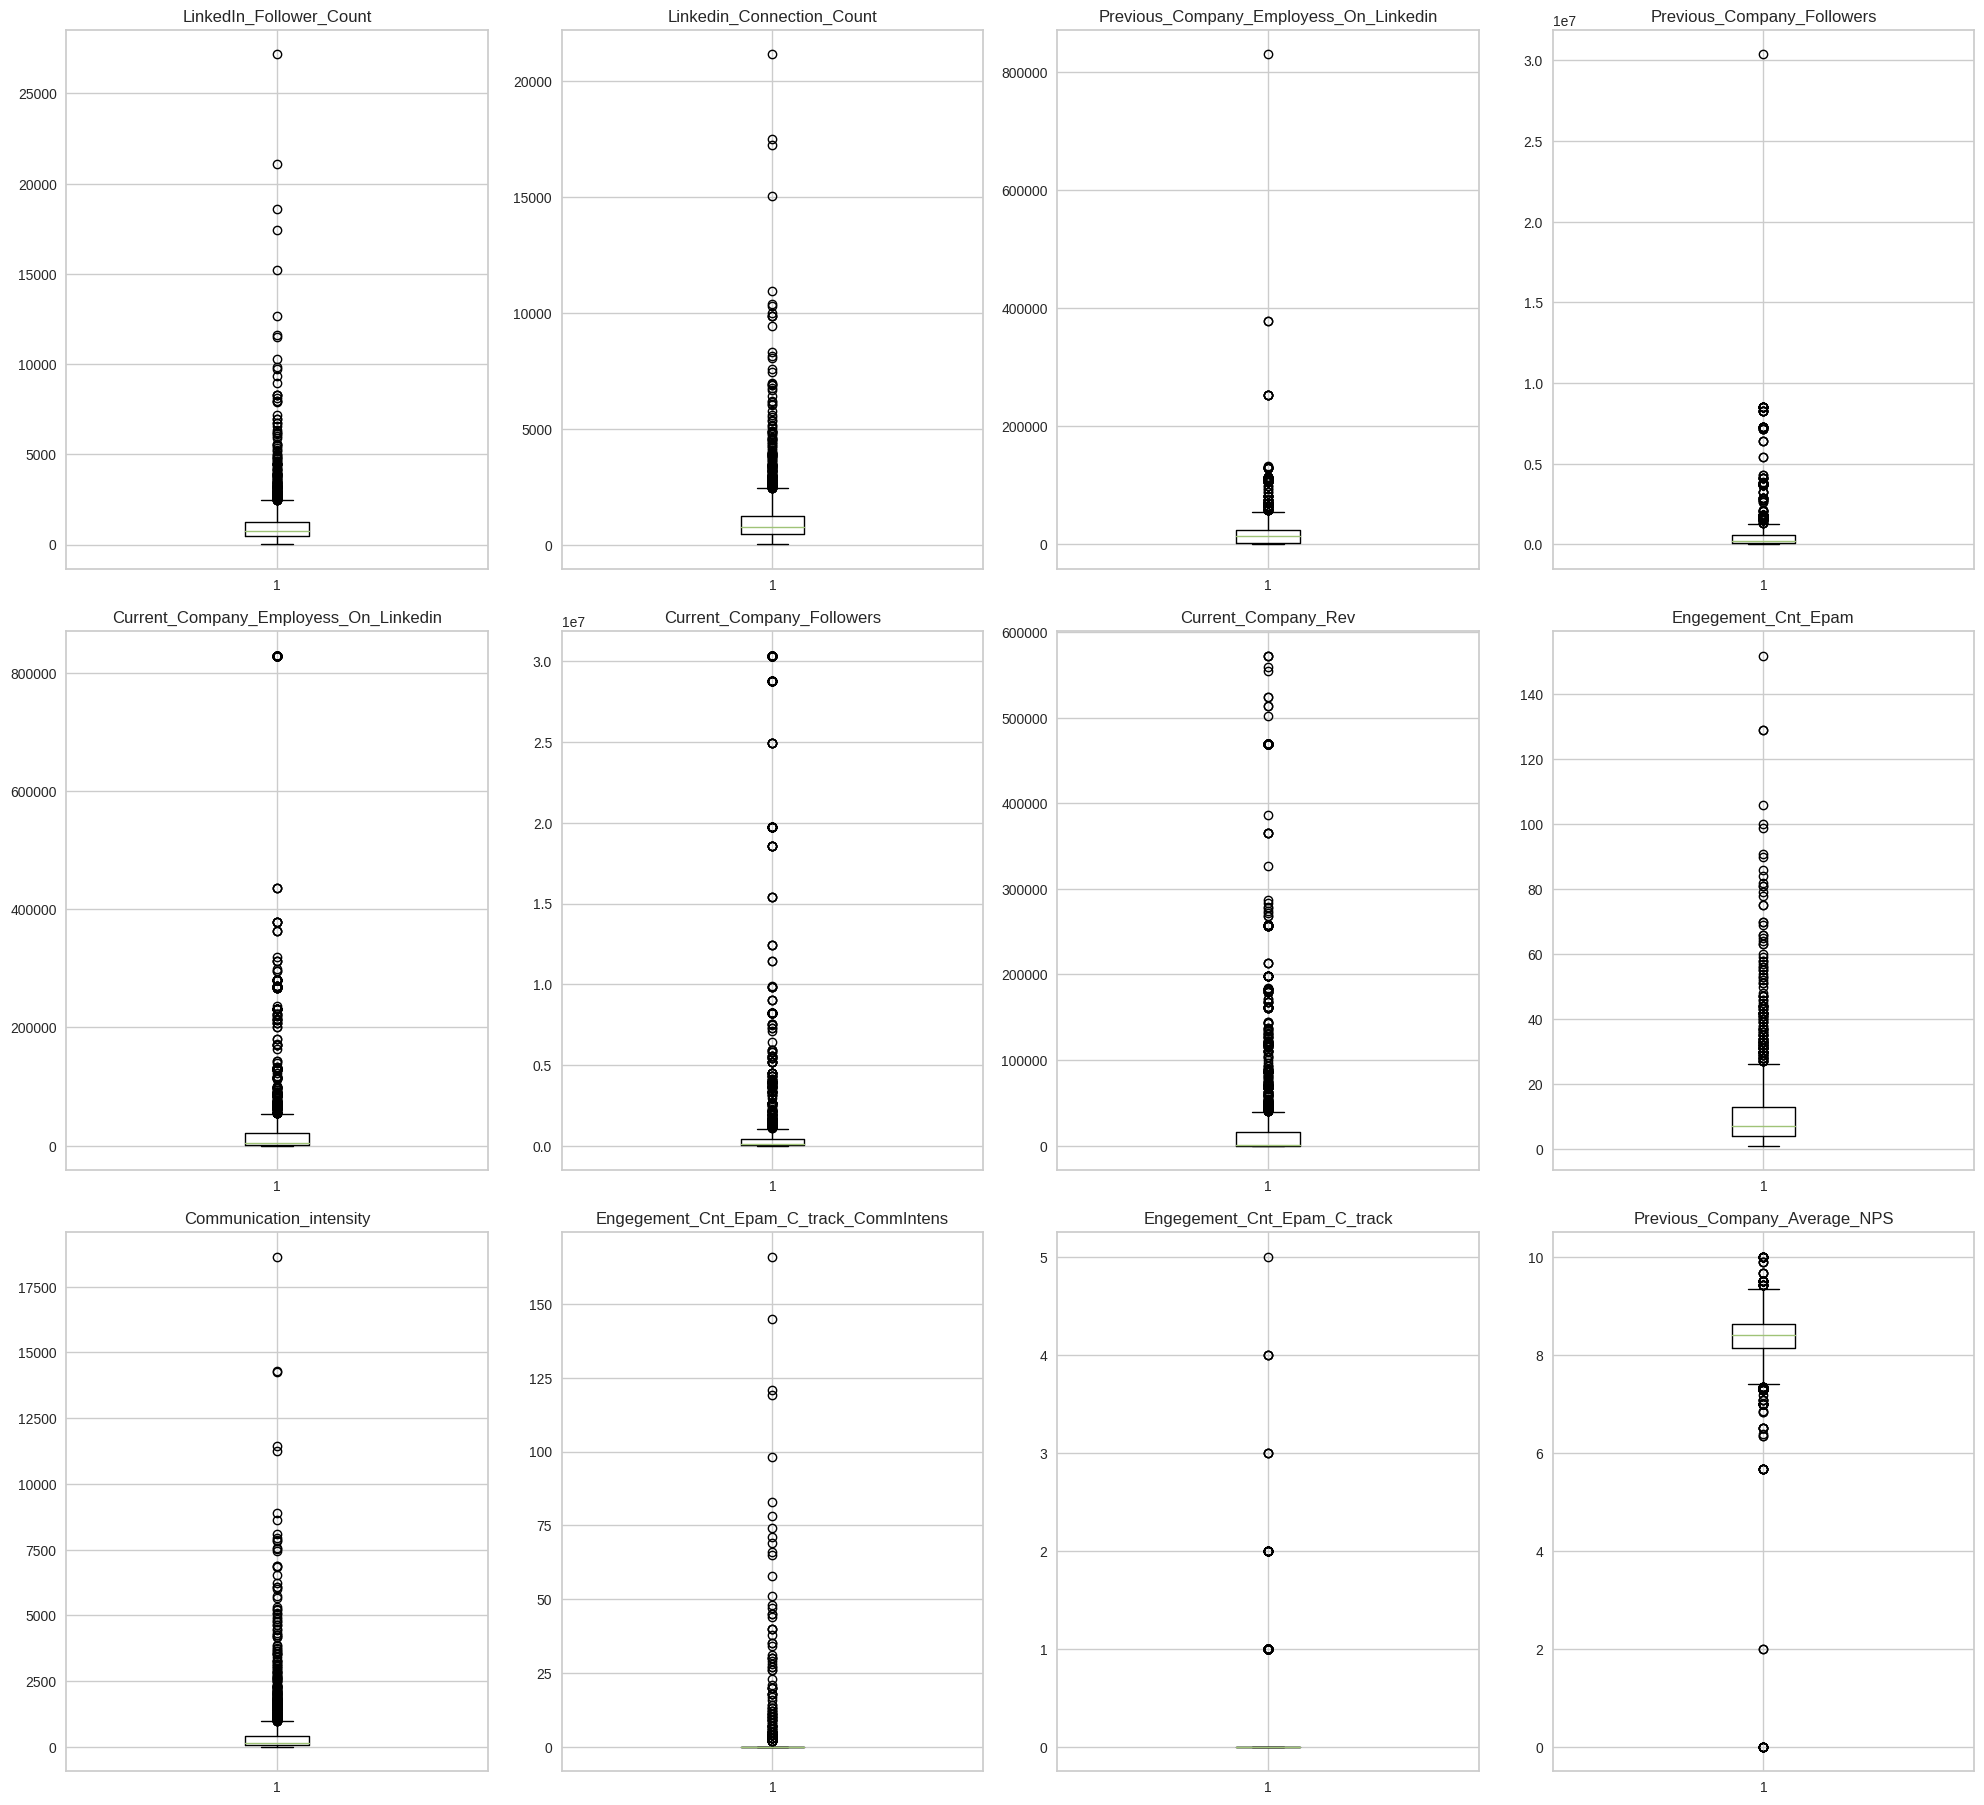

In [ ]:
numerical_col = data_pre_process.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data_pre_process[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Outliers Treated for Training Data Set**

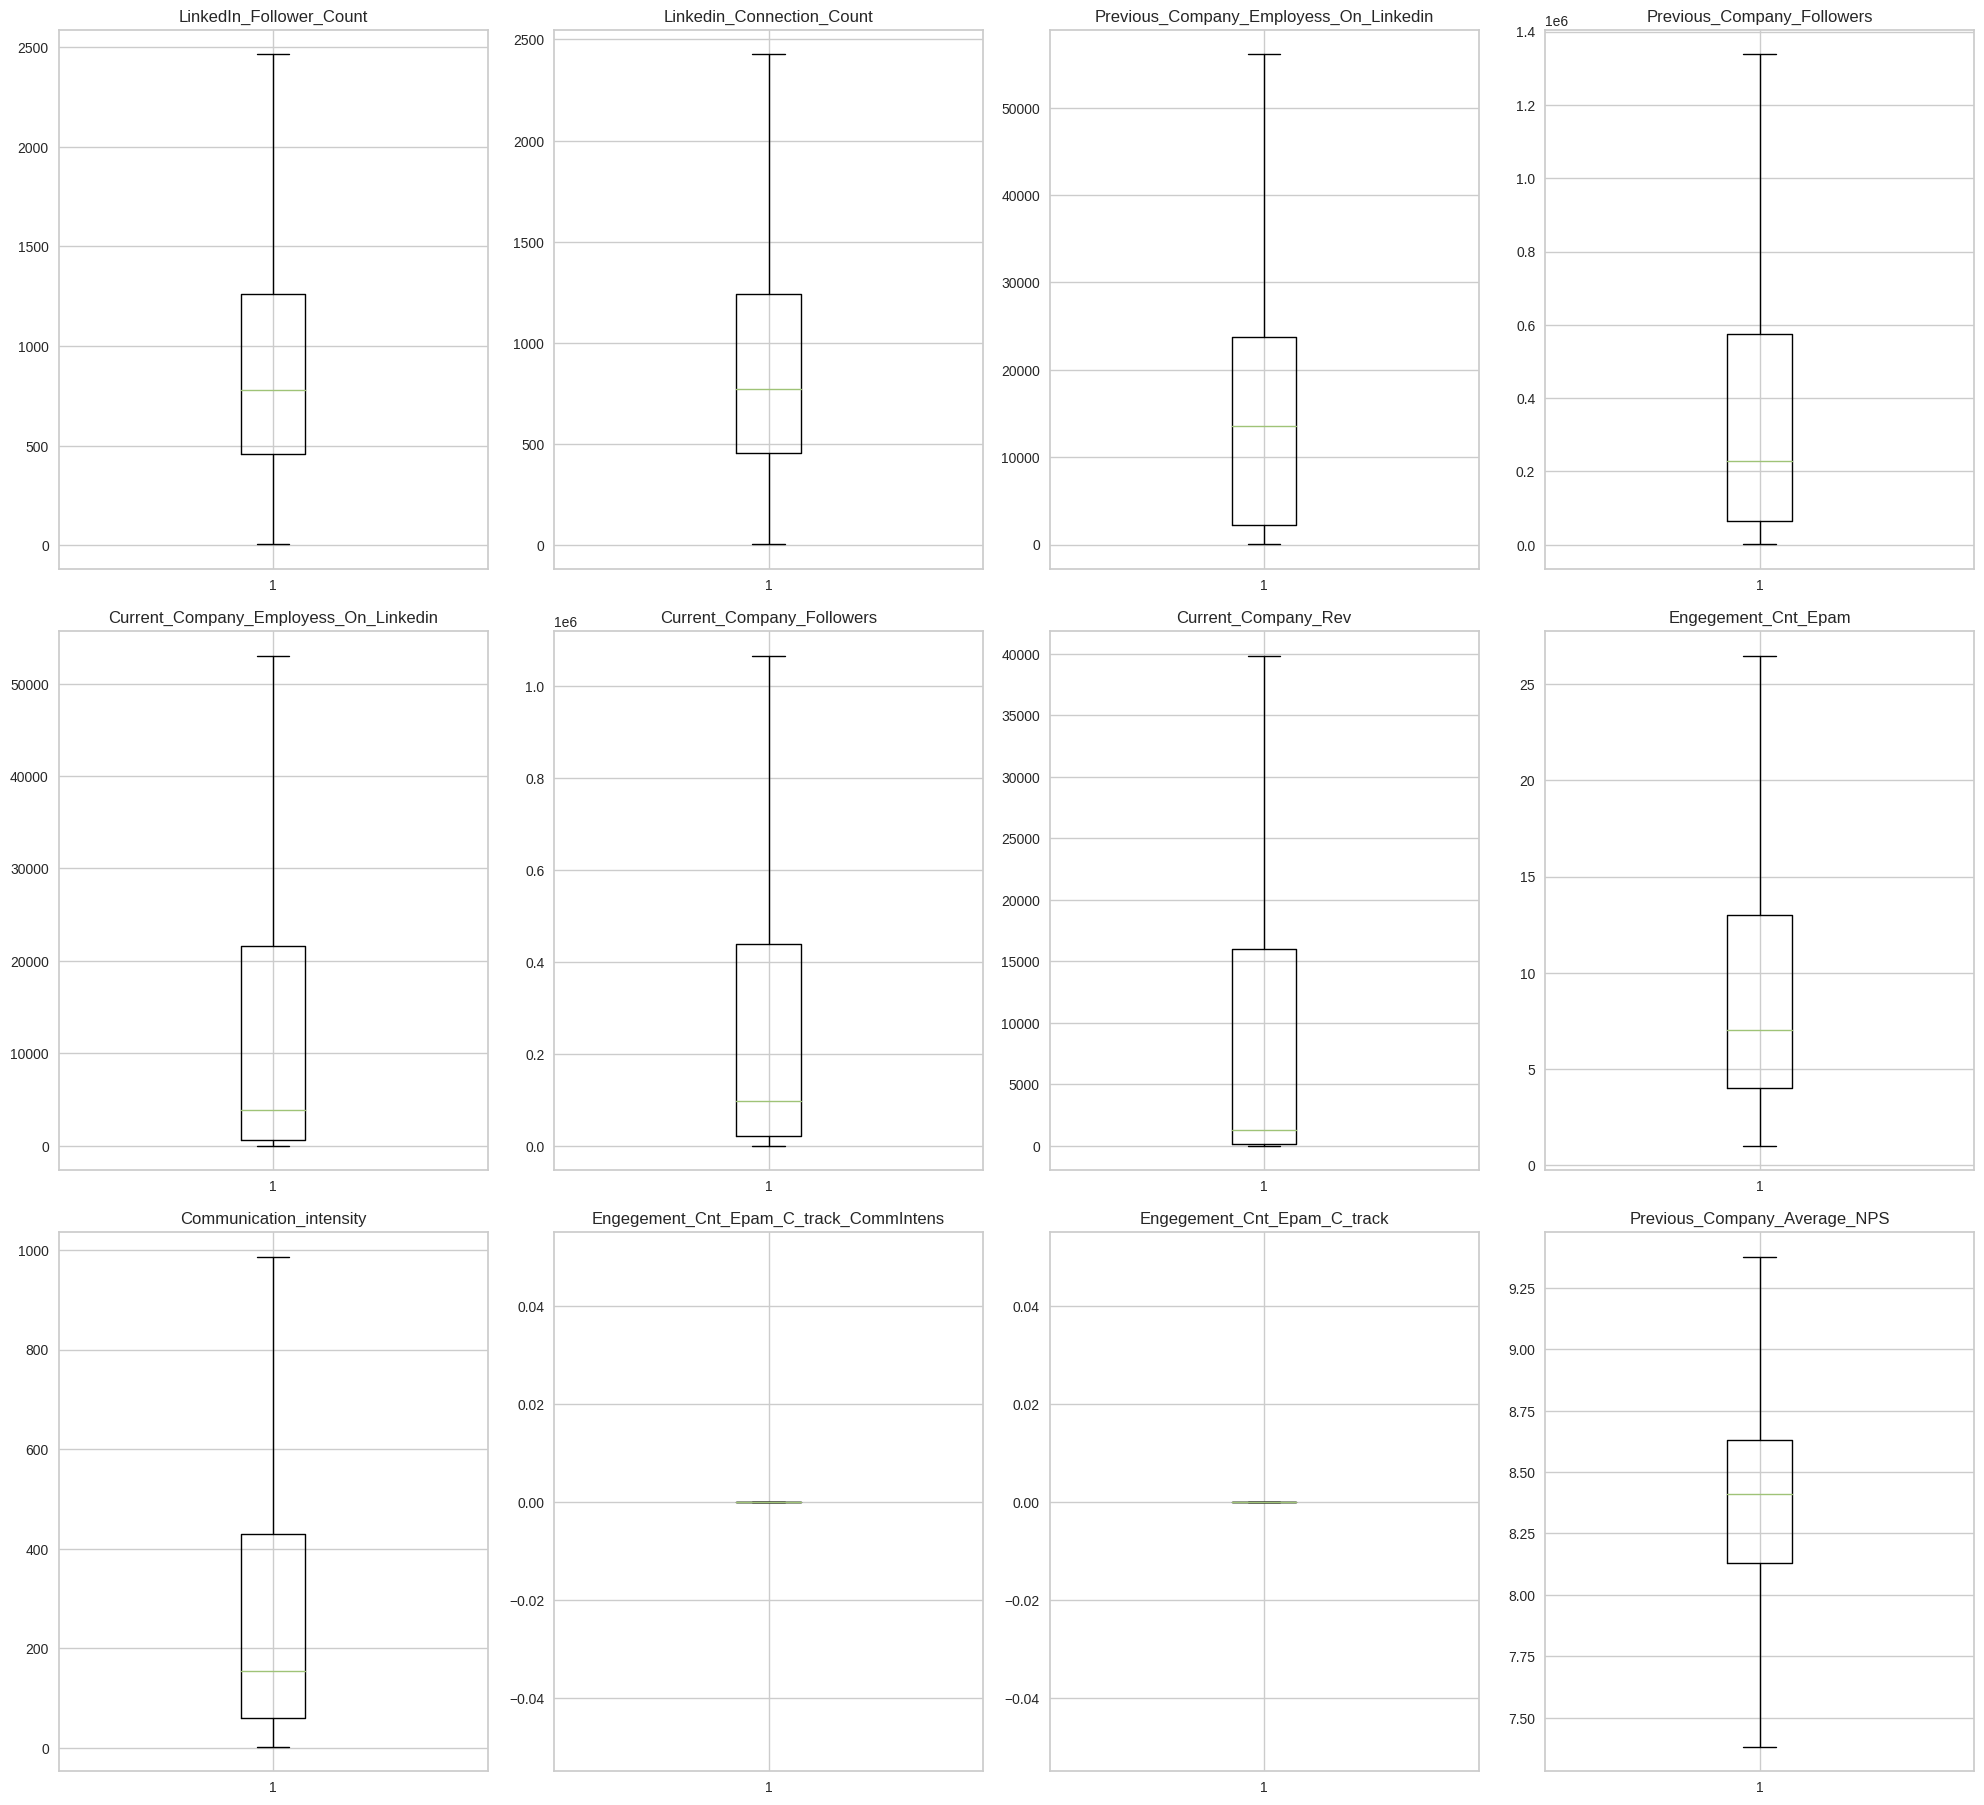

In [ ]:
numerical_col = data_pre_process.select_dtypes(include=np.number).columns.tolist()
X_train = treat_outliers_all(data_pre_process, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_train[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data_model=data_pre_process.copy()

Droping Unused String Values From Model 

In [ ]:
def drop_object_columns(data):
    object_columns = data.select_dtypes(include=['object']).columns
    data_copy = data.drop(object_columns, axis=1)
    return data_copy

In [ ]:
data_model=drop_object_columns(data_model)

In [ ]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   LinkedIn_Follower_Count                 2245 non-null   float64 
 1   Linkedin_Connection_Count               2245 non-null   float64 
 2   Previous_Seniority_Level                2245 non-null   category
 3   Current_Seniority_Level                 2245 non-null   category
 4   Previous_Company_Size                   2245 non-null   category
 5   Previous_Company_Employess_On_Linkedin  2245 non-null   float64 
 6   Previous_Company_Followers              2245 non-null   float64 
 7   Previous_Company_Parent_Cmp_exist       2245 non-null   category
 8   Current_Company_Size                    2245 non-null   category
 9   Current_Company_Employess_On_Linkedin   2245 non-null   float64 
 10  Current_Company_Followers               2245 non

Dropping String Values to generate model data

In [ ]:
#data_model = data_model.drop(['Previous_Company_Followers'],axis=1)

In [ ]:
#data_model = data_model.drop(['Current_Company_Employess_On_Linkedin'],axis=1)

In [ ]:
#data_model = data_model.drop(['Current_Company_Followers'],axis=1)

In [ ]:
#data_model = data_model.drop(['Previous_Company_Employess_On_Linkedin'],axis=1)

In [ ]:
#data_model = data_model.drop(['Previous_Company_Parent_Cmp_exist'],axis=1)

In [ ]:
#data_model = data_model.drop(['LinkedIn_Follower_Count'],axis=1)

In [ ]:
#data_model = data_model.drop(['Linkedin_Connection_Count'],axis=1)

In [ ]:
#data_model = data_model.drop(['Previous_Company'],axis=1)

In [ ]:
#data_model = data_model.drop(['Current_Company_Parent_Cmp_exist'],axis=1)

In [ ]:
#data_model = data_model.drop(['Current_Company'],axis=1)

MAP Seniority Level

In [ ]:
Seniority_Level={"A":3,"B":2,"C":1,"Other":0}

In [ ]:

data_model["Previous_Seniority_Level"] = data_model["Previous_Seniority_Level"].map(Seniority_Level)

In [ ]:
data_model["Current_Seniority_Level"] = data_model["Current_Seniority_Level"].map(Seniority_Level)

In [ ]:
data_model["Seniority_Level_Of_Epam"] = data_model["Seniority_Level_Of_Epam"].map(Seniority_Level)

In [ ]:
print(data.Previous_Company_Size.value_counts())

10001+        1407
1001-5000      376
201-500        155
501-1000       128
5001-10000     116
51-200          41
2-10            12
11-50            5
Other            4
0-1              1
Name: Previous_Company_Size, dtype: int64


MAP Company Size

In [ ]:
#CompanySize={"Other":0,"0-1":1,"2-10":2,"11-50":3,"51-200":4,"201-500":5,"501-1000":6,"1001-5000":7,"5001-10000":8,"10001+":9}

Defining the new clustering sizes

In [ ]:
Size_1=["Other","0-1","2-10","11-50","51-200"]

In [ ]:
Size_2=["201-500","501-1000"]

In [ ]:
Size_3=["1001-5000","5001-10000","10001+"]

In [ ]:
def reduce_company_size(x):
    if x in Size_1:
        return "Size_1"
    elif x in Size_2:
        return "Size_2"
    elif x in Size_3:
        return "Size_3"
    else:    
        return x

In [ ]:
data_model.Previous_Company_Size=data_model.Previous_Company_Size.apply(reduce_company_size)

In [ ]:
data_model.Current_Company_Size=data_model.Current_Company_Size.apply(reduce_company_size)

In [ ]:
data_model["Previous_Company_Size"]

0       Size_3
1       Size_3
2       Size_3
3       Size_3
4       Size_3
         ...  
2240    Size_1
2241    Size_3
2242    Size_3
2243    Size_3
2244    Size_3
Name: Previous_Company_Size, Length: 2245, dtype: object

In [ ]:
data_model["Current_Company_Size"] 

0       Size_3
1       Size_3
2       Size_3
3       Size_3
4       Size_3
         ...  
2240    Size_1
2241    Size_3
2242    Size_3
2243    Size_3
2244    Size_1
Name: Current_Company_Size, Length: 2245, dtype: object

In [ ]:
print(data_model.Previous_Seniority_Level.value_counts())

2    882
1    723
3    466
0    174
Name: Previous_Seniority_Level, dtype: int64


In [ ]:
print(data_model.Current_Company_Size.value_counts())

Size_3    1375
Size_1     524
Size_2     346
Name: Current_Company_Size, dtype: int64


In [ ]:
round(data_model.isnull().sum() / data_model.isnull().count() * 100, 2)

LinkedIn_Follower_Count                   0.0
Linkedin_Connection_Count                 0.0
Previous_Seniority_Level                  0.0
Current_Seniority_Level                   0.0
Previous_Company_Size                     0.0
Previous_Company_Employess_On_Linkedin    0.0
Previous_Company_Followers                0.0
Previous_Company_Parent_Cmp_exist         0.0
Current_Company_Size                      0.0
Current_Company_Employess_On_Linkedin     0.0
Current_Company_Followers                 0.0
Current_Company_Rev                       0.0
Current_Company_Parent_Cmp_exist          0.0
Engegement_Cnt_Epam                       0.0
Communication_intensity                   0.0
First_engagement_year                     0.0
Engagement_Duration_Epam                  0.0
Seniority_Level_Of_Epam                   0.0
Engegement_Cnt_Epam_C_track_CommIntens    0.0
Engegement_Cnt_Epam_C_track               0.0
Previous_Company_Forbes                   0.0
Current_Company_Forbes            

In [ ]:
data_model

LinkedIn_Follower_Count  Linkedin_Connection_Count  \
0                      1210.0                     1220.0   
1                      1119.0                     1126.0   
2                       742.0                      732.0   
3                       642.0                      629.0   
4                       810.0                      808.0   
...                       ...                        ...   
2240                   2464.0                     2426.0   
2241                    348.0                      349.0   
2242                    608.0                      612.0   
2243                    890.0                      889.0   
2244                    985.0                      993.0   

     Previous_Seniority_Level Current_Seniority_Level Previous_Company_Size  \
0                           1                       3                Size_3   
1                           1                       1                Size_3   
2                           2                       3                Size_3   
3                           1                       1                Size_3   
4                           2                       2                Size_3   
...                       ...                     ...                   ...   
2240                        1                       1                Size_1   
2241                        3                       0                Size_3   
2242                        3                       3                Size_3   
2243                        2                       3                Size_3   
2244                        2                       2                Size_3   

      Previous_Company_Employess_On_Linkedin  Previous_Company_Followers  \
0                                    14124.0                    173891.0   
1                                    14124.0                    173891.0   
2                                    14124.0                    173891.0   
3                                    14124.0                    173891.0   
4                                    14124.0                    173891.0   
...                                      ...                         ...   
2240                                 13524.0                    229484.0   
2241                                  2948.0                     51135.0   
2242                                  2948.0                     51135.0   
2243                                  2948.0                     51135.0   
2244                                  2948.0                     51135.0   

     Previous_Company_Parent_Cmp_exist Current_Company_Size  \
0                                    0               Size_3   
1                                    0               Size_3   
2                                    0               Size_3   
3                                    0               Size_3   
4                                    0               Size_3   
...                                ...                  ...   
2240                                 0               Size_1   
2241                                 1               Size_3   
2242                                 1               Size_3   
2243                                 1               Size_3   
2244                                 1               Size_1   

      Current_Company_Employess_On_Linkedin  Current_Company_Followers  \
0                                   16747.0                   713684.0   
1                                   53040.5                  1065846.0   
2                                   53040.5                  1065846.0   
3                                   28158.0                   196232.0   
4                                    5238.0                    45063.0   
...                                     ...                        ...   
2240                                    7.0                      167.0   
2241                                 4264.0                   307357.0   


This function checks for existance ratio of categories 

In [ ]:
def calculate_existence_ratio(data, column):
    value_counts = data[column].value_counts()
    total_count = data[column].count()
    existence_ratio = value_counts / total_count
    return existence_ratio

In [ ]:
existence_ratio = calculate_existence_ratio(data_model, "Previous_Company_Industry")

In [ ]:
existence_ratio

Computer Software                                        0.211581
Entertainment                                            0.131403
IT Services and IT Consulting                            0.130512
Retail                                                   0.067261
Information Services                                     0.058797
Financial Services                                       0.047216
Hospital & Health Care                                   0.044543
Food & Beverages                                         0.027171
Biotechnology                                            0.020490
Transportation/Trucking/Railroad                         0.020045
Restaurants                                              0.020045
Pharmaceutical Manufacturing                             0.018263
Automotive                                               0.018263
Insurance                                                0.016481
Consumer Goods                                           0.016481
Apparel & 

In [ ]:
existence_ratio = calculate_existence_ratio(data_model, "Previous_Company_Satisfaction_Category")

In [ ]:
existence_ratio

Passive      0.826726
Other        0.126949
Promoter     0.032071
Detractor    0.014254
Name: Previous_Company_Satisfaction_Category, dtype: float64

In [ ]:
Previous_Company_Satisfaction_Category={"Passive":4,"Promoter":3,"Detractor":2,"Other":1}

In [ ]:
data_model["Previous_Company_Satisfaction_Category"] = data_model["Previous_Company_Satisfaction_Category"].map(Previous_Company_Satisfaction_Category)

These 2 ROWS Removed due to their threshold value is so high in categorization

In [ ]:
data_model = data_model.drop(['Previous_Company_Industry'],axis=1)

In [ ]:
data_model = data_model.drop(['Current_Company_Industry'],axis=1)

In [ ]:
data_model

LinkedIn_Follower_Count  Linkedin_Connection_Count  \
0                      1210.0                     1220.0   
1                      1119.0                     1126.0   
2                       742.0                      732.0   
3                       642.0                      629.0   
4                       810.0                      808.0   
...                       ...                        ...   
2240                   2464.0                     2426.0   
2241                    348.0                      349.0   
2242                    608.0                      612.0   
2243                    890.0                      889.0   
2244                    985.0                      993.0   

     Previous_Seniority_Level Current_Seniority_Level Previous_Company_Size  \
0                           1                       3                Size_3   
1                           1                       1                Size_3   
2                           2                       3                Size_3   
3                           1                       1                Size_3   
4                           2                       2                Size_3   
...                       ...                     ...                   ...   
2240                        1                       1                Size_1   
2241                        3                       0                Size_3   
2242                        3                       3                Size_3   
2243                        2                       3                Size_3   
2244                        2                       2                Size_3   

      Previous_Company_Employess_On_Linkedin  Previous_Company_Followers  \
0                                    14124.0                    173891.0   
1                                    14124.0                    173891.0   
2                                    14124.0                    173891.0   
3                                    14124.0                    173891.0   
4                                    14124.0                    173891.0   
...                                      ...                         ...   
2240                                 13524.0                    229484.0   
2241                                  2948.0                     51135.0   
2242                                  2948.0                     51135.0   
2243                                  2948.0                     51135.0   
2244                                  2948.0                     51135.0   

     Previous_Company_Parent_Cmp_exist Current_Company_Size  \
0                                    0               Size_3   
1                                    0               Size_3   
2                                    0               Size_3   
3                                    0               Size_3   
4                                    0               Size_3   
...                                ...                  ...   
2240                                 0               Size_1   
2241                                 1               Size_3   
2242                                 1               Size_3   
2243                                 1               Size_3   
2244                                 1               Size_1   

      Current_Company_Employess_On_Linkedin  Current_Company_Followers  \
0                                   16747.0                   713684.0   
1                                   53040.5                  1065846.0   
2                                   53040.5                  1065846.0   
3                                   28158.0                   196232.0   
4                                    5238.0                    45063.0   
...                                     ...                        ...   
2240                                    7.0                      167.0   
2241                                 4264.0                   307357.0   


**4.3** **Creating Dummy Variables On Data Set**

In [ ]:
data_model_one_hot_encoding = pd.get_dummies(data_model, drop_first=True)


In [ ]:
data_model_one_hot_encoding

LinkedIn_Follower_Count  Linkedin_Connection_Count  \
0                      1210.0                     1220.0   
1                      1119.0                     1126.0   
2                       742.0                      732.0   
3                       642.0                      629.0   
4                       810.0                      808.0   
...                       ...                        ...   
2240                   2464.0                     2426.0   
2241                    348.0                      349.0   
2242                    608.0                      612.0   
2243                    890.0                      889.0   
2244                    985.0                      993.0   

      Previous_Company_Employess_On_Linkedin  Previous_Company_Followers  \
0                                    14124.0                    173891.0   
1                                    14124.0                    173891.0   
2                                    14124.0                    173891.0   
3                                    14124.0                    173891.0   
4                                    14124.0                    173891.0   
...                                      ...                         ...   
2240                                 13524.0                    229484.0   
2241                                  2948.0                     51135.0   
2242                                  2948.0                     51135.0   
2243                                  2948.0                     51135.0   
2244                                  2948.0                     51135.0   

      Current_Company_Employess_On_Linkedin  Current_Company_Followers  \
0                                   16747.0                   713684.0   
1                                   53040.5                  1065846.0   
2                                   53040.5                  1065846.0   
3                                   28158.0                   196232.0   
4                                    5238.0                    45063.0   
...                                     ...                        ...   
2240                                    7.0                      167.0   
2241                                 4264.0                   307357.0   
2242                                36141.0                   268551.0   
2243                                53040.5                  1065846.0   
2244                                 3906.0                    98110.5   

      Current_Company_Rev  Engegement_Cnt_Epam  Communication_intensity  \
0                4611.900                  2.0                     13.0   
1               39850.000                  7.0                     55.0   
2               39850.000                  9.0                    179.0   
3               39850.000                 14.0                    402.0   
4                3433.500                 24.0                    986.5   
...                   ...                  ...                      ...   
2240                2.000                  3.0                     57.0   
2241              761.027                 13.0                    986.5   
2242            39850.000                  3.0                    173.0   
2243            39850.000                  2.0                    102.0   
2244              865.390                  2.0                     74.0   

      Engegement_Cnt_Epam_C_track_CommIntens  Engegement_Cnt_Epam_C_track  \
0                                        0.0                          0.0   
1                                        0.0                          0.0   
2                                        0.0                          0.0   
3                                        0.0                          0.0   
4                                        0.0                          0.0   
...                                      ...                          ...   
2240                                     0.

In [ ]:
#data_model

##5-BUILDING MODEL

Scale Data 

In [ ]:
sc = StandardScaler()


In [ ]:
data_scaled = pd.DataFrame(
    sc.fit_transform(data_model_one_hot_encoding),    
)

In [ ]:
data_scaled.head()

0         1        2         3         4         5         6   \
0  0.392858  0.438107 -0.18978 -0.513301  0.111241  1.059980 -0.380738   
1  0.254400  0.291904 -0.18978 -0.513301  1.944578  1.959396  1.943913   
2 -0.319208 -0.320904 -0.18978 -0.513301  1.944578  1.959396  1.943913   
3 -0.471359 -0.481105 -0.18978 -0.513301  0.687658 -0.261583  1.943913   
4 -0.215746 -0.202697 -0.18978 -0.513301 -0.470127 -0.647666 -0.458477   

         7         8    9    10       11        12        13        14  \
0 -1.055843 -0.874402  0.0  0.0  0.19424 -0.804426  1.450902 -0.289858   
1 -0.355028 -0.745395  0.0  0.0  0.19424 -0.804426  1.450902 -0.289858   
2 -0.074702 -0.364518  0.0  0.0  0.19424  1.243122 -0.689226 -0.289858   
3  0.626113  0.320446  0.0  0.0  0.19424 -0.804426  1.450902 -0.289858   
4  2.027743  2.115790  0.0  0.0  0.19424  1.243122 -0.689226 -0.289858   

         15        16        17       18       19        20       21  \
0 -0.752031 -0.738295 -0.328778 -0.37979  0.42685 -0.558657 -0.42685   
1 -0.752031  1.354473 -0.328778 -0.37979  0.42685 -0.558657 -0.42685   
2 -0.752031 -0.738295 -0.328778 -0.37979  0.42685 -0.558657 -0.42685   
3 -0.752031  1.354473 -0.328778 -0.37979  0.42685 -0.558657 -0.42685   
4  1.329732 -0.738295 -0.328778 -0.37979  0.42685 -0.558657 -0.42685   

         22        23        24        25        26        27        28  \
0  0.795442 -0.318701 -0.535288  2.448218 -0.391224 -0.237635 -0.082015   
1  0.795442 -0.318701 -0.535288  2.448218 -0.391224 -0.237635 -0.082015   
2  0.795442 -0.318701 -0.535288  2.448218 -0.391224 -0.237635 -0.082015   
3  0.795442 -0.318701 -0.535288  2.448218 -0.391224 -0.237635 -0.082015   
4  0.795442 -0.318701 -0.535288 -0.408460  2.556082 -0.237635 -0.082015   

         29        30        31       32        33       34        35  \
0 -0.952571 -0.511806 -0.241791 -0.12945 -0.063443 -0.02111 -2.383600   
1 -0.952571 -0.511806 -0.241791 -0.12945 -0.063443 -0.02111  0.419534   
2 -0.952571 -0.511806 -0.241791 -0.12945 -0.063443 -0.02111  0.419534   
3 -0.952571 -0.511806 -0.241791 -0.12945 -0.063443 -0.02111  0.419534   
4  1.049790 -0.511806 -0.241791 -0.12945 -0.063443 -0.02111  0.419534   

         36        37        38        39        40        41        42  
0  3.984934 -0.169919  1.639015  2.016859 -0.381324  0.457811 -0.182027  
1 -0.250945 -0.169919  1.639015  2.016859 -0.381324  0.457811 -0.182027  
2 -0.250945 -0.169919  1.639015  2.016859 -0.381324  0.457811 -0.182027  
3 -0.250945 -0.169919  1.639015 -0.495820 -0.381324  0.457811 -0.182027  
4 -0.250945 -0.169919  1.639015 -0.495820 -0.381324  0.457811 -0.182027

5.1 UNSUPERVISED LEARNING METHODS

5.1.1 K-Means

Choosing up to cluster range(1,9) , matching the Euclidean distance calculation 

Data is scaled(before) since Euclidean Calculation is sensitive to outliers 

Number of Clusters: 1 	Average Distortion: 6.144645045958005
Number of Clusters: 2 	Average Distortion: 5.897593278655898
Number of Clusters: 3 	Average Distortion: 5.734099035018924
Number of Clusters: 4 	Average Distortion: 5.594171531187304
Number of Clusters: 5 	Average Distortion: 5.49579637825712
Number of Clusters: 6 	Average Distortion: 5.416141434953511
Number of Clusters: 7 	Average Distortion: 5.327766602858983
Number of Clusters: 8 	Average Distortion: 5.237008163912165


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

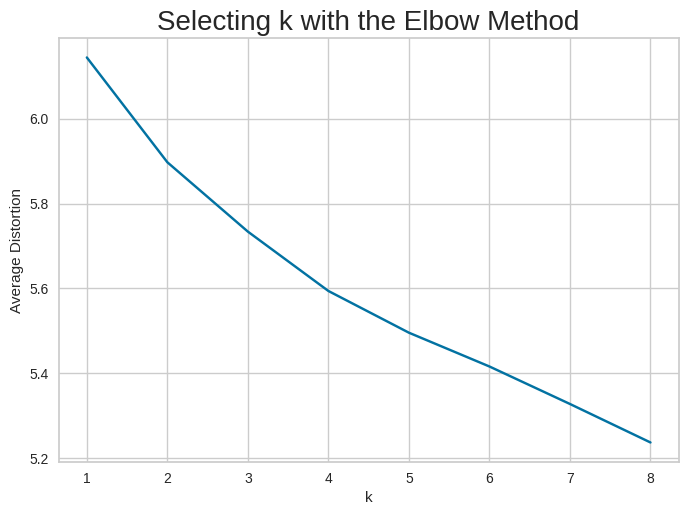

In [ ]:
clusters = range(1, 9)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(data_scaled)  # Fit kMeans on the data
    prediction = model.predict(data_scaled)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(data_scaled, model.cluster_centers_, "euclidean"), axis=1))
        / data_scaled.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

Check Elbow method for 3, 6 Clusters

5.1.2 Calculating Silhouette Score

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means.

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

Silhouette score has a range of [-1, 1].

Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters.
Silhouette score near -1 indicate that those samples might have been assigned to the wrong cluster.

For n_clusters = 2, silhouette score is 0.094076916144554
For n_clusters = 3, silhouette score is 0.0759122316311442
For n_clusters = 4, silhouette score is 0.08461564883441412
For n_clusters = 5, silhouette score is 0.081661678230301
For n_clusters = 6, silhouette score is 0.07518349873469835
For n_clusters = 7, silhouette score is 0.08045216285665899
For n_clusters = 8, silhouette score is 0.07455675466154592


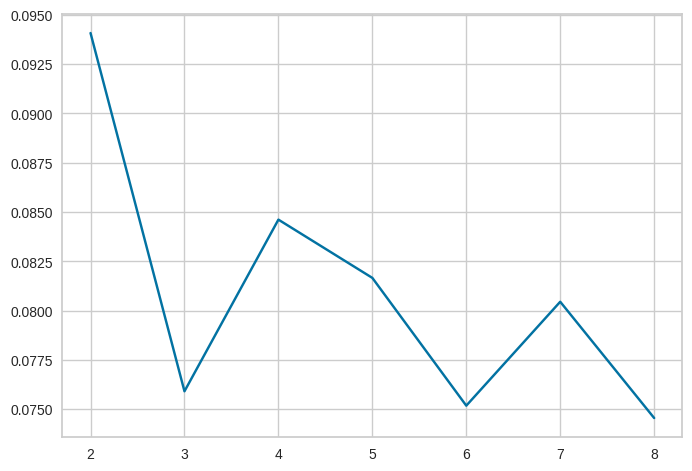

In [ ]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 9))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((data_scaled))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(data_scaled, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

5.1.3 Score SilhouetteVisualizer

Below are the points that every cluster needs to satisfy for selecting the optimal K-value.

There should be no negative silhouette coefficent value
All the clusters should cross the avg silhouette score
All the clusters should have the different variations (width)
All the clusters should have different silhouette score
Note

Width of each cluster refers to the size of each cluster. (Number of data points present in each cluster)
Horizontal line refers to the Silhouette score of each cluster.
Dotted red line is an Average Silhouette score

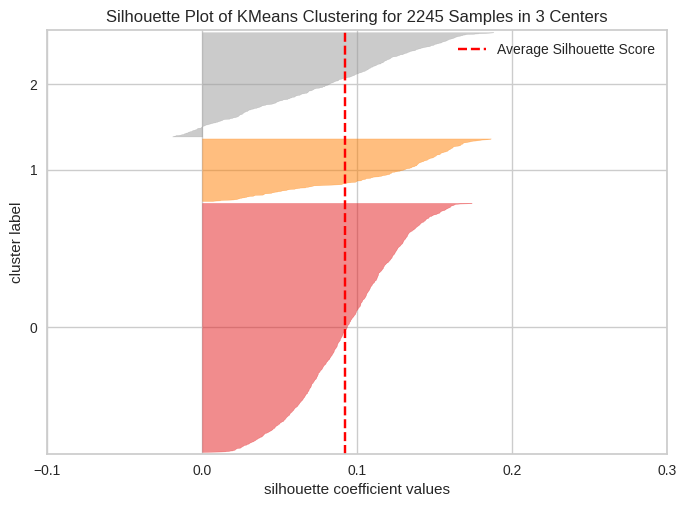

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2245 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

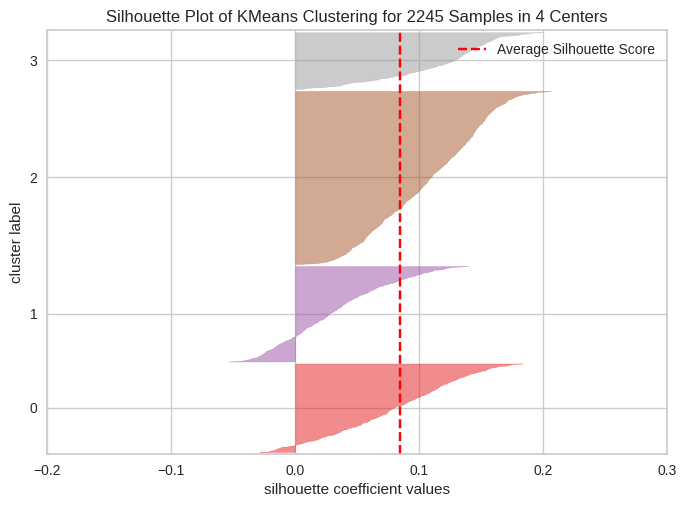

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2245 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

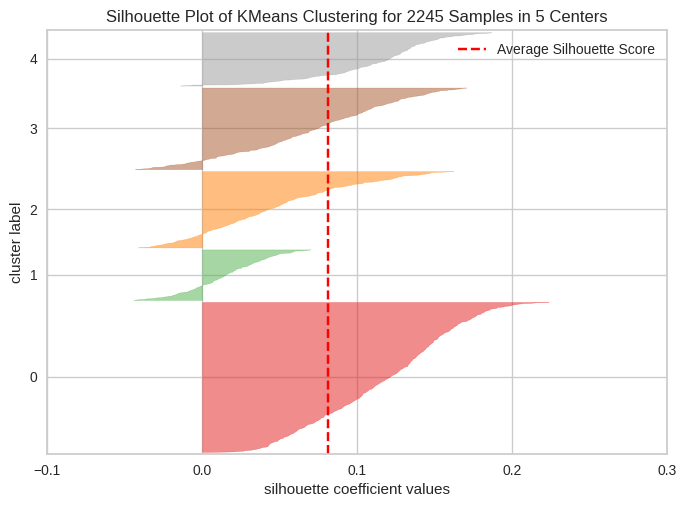

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2245 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

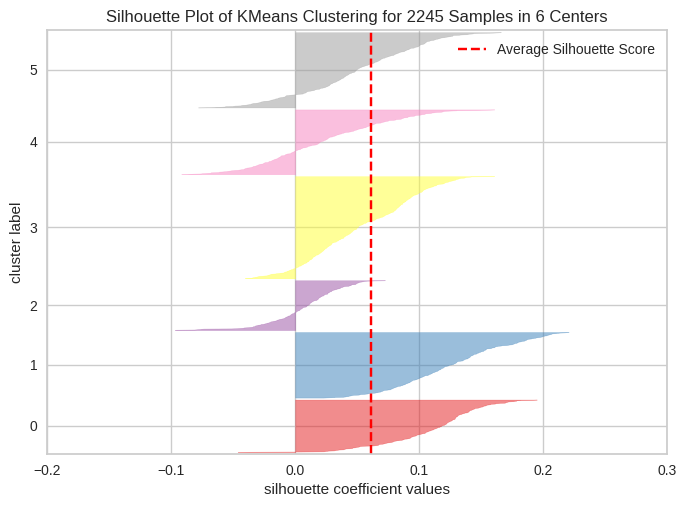

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2245 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

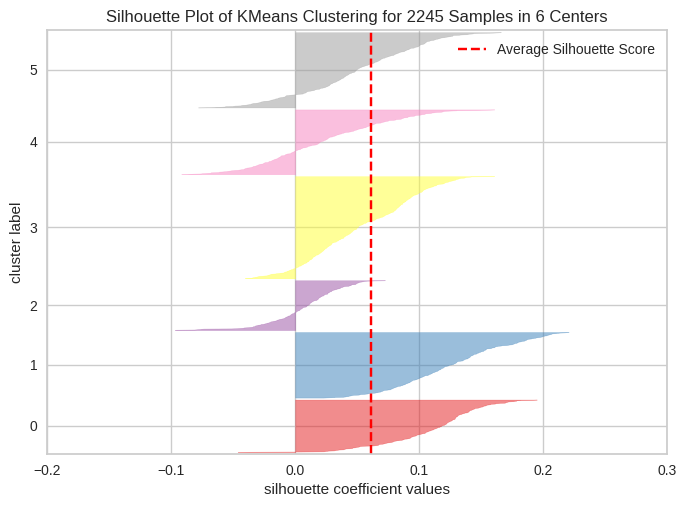

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2245 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(data_scaled)
visualizer.show()

5.1.4 **Applying K Means**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=1)

In [ ]:
data_K_Means=data_pre_process.copy()

In [ ]:
data_K_Means["K_means_segments"]=kmeans.labels_

In [ ]:
data_K_Means

LinkedIn_Profile  \
0                 https://www.linkedin.com/in/bajjarapu   
1     https://www.linkedin.com/in/youssef-ismaili-93...   
2     https://www.linkedin.com/in/carlos-pinzon-4643...   
3      https://www.linkedin.com/in/kat-ashford-87383222   
4      https://www.linkedin.com/in/usha-karnala-966120a   
...                                                 ...   
2240  https://www.linkedin.com/in/brian-tehako-38002...   
2241  https://www.linkedin.com/in/brian-byars-24954b59/   
2242  https://www.linkedin.com/in/daliya-asuma-7632046/   
2243        https://www.linkedin.com/in/justindaleiden/   
2244              https://www.linkedin.com/in/ralrayes/   

      LinkedIn_Follower_Count  Linkedin_Connection_Count         Full_Name  \
0                      1210.0                     1220.0  Bhaskar Ajjarapu   
1                      1119.0                     1126.0   Youssef Ismaili   
2                       742.0                      732.0     Carlos Pinzon   
3                       642.0                      629.0       Kat Ashford   
4                       810.0                      808.0      Usha Karnala   
...                       ...                        ...               ...   
2240                   2464.0                     2426.0      Brian Tehako   
2241                    348.0                      349.0       Brian Byars   
2242                    608.0                      612.0      Daliya Asuma   
2243                    890.0                      889.0   Justin Daleiden   
2244                    985.0                      993.0      Rima AlRayes   

                           Searched_Email Previous_Seniority_Level  \
0            bhaskar.ajjarapu@equifax.com                        C   
1             youssef.ismaili@equifax.com                        C   
2          carlos.pinzonpinto@equifax.com                        B   
3           katherine.ashford@equifax.com                        C   
4                usha.karnala@equifax.com                        B   
...                                   ...                      ...   
2240                 btehako@hehmeyer.com                        C   
2241                brian.byars@hilti.com                        A   
2242               daliya.asuma@hilti.com                        A   
2243  justin.daleiden@externals.hilti.com                        B   
2244               rima.alrayes@hilti.com                        B   

     Current_Seniority_Level     Previous_Company Previous_Company_Size  \
0                          A              Equifax                10001+   
1                          C              Equifax                10001+   
2                          A              Equifax                10001+   
3                          C              Equifax                10001+   
4                          B              Equifax                10001+   
...                      ...                  ...                   ...   
2240                       C             Hehmeyer                 Other   
2241                   Other  Hilti North America             1001-5000   
2242                       A  Hilti North America             1001-5000   
2243                       A  Hilti North America             1001-5000   
2244                       B  Hilti North America             1001-5000   

      Previous_Company_Employess_On_Linkedin  Previous_Company_Followers  \
0                                    14124.0                    173891.0   
1                                    14124.0                    173891.0   
2                                    14124.0                    173891.0   
3                                    14124.0                    173891.0   
4                                    14124.0                    173891.0   
...                                      ...                         ...   
2240                                 13524.0                    229484.0   
2241                                  2948.

In [ ]:
# let's see the names of the countries in each cluster
for cl in data_K_Means["K_means_segments"].unique():
    print("In cluster {}, Contacts are :".format(cl))
    print(data_K_Means[data_K_Means["K_means_segments"] == cl]["LinkedIn_Profile"].unique())
    print()

In cluster 2, Contacts are :
['https://www.linkedin.com/in/bajjarapu'
 'https://www.linkedin.com/in/youssef-ismaili-936a6758'
 'https://www.linkedin.com/in/carlos-pinzon-46430111'
 'https://www.linkedin.com/in/kat-ashford-87383222'
 'https://www.linkedin.com/in/stevegillam'
 'https://www.linkedin.com/in/cameronsmcleod'
 'https://www.linkedin.com/in/ehab-ghabour-9aa02013'
 'https://www.linkedin.com/in/kris-nelson-mn'
 'https://www.linkedin.com/in/scottgebhart/'
 'https://www.linkedin.com/in/paul-guerra-7433b09'
 'https://www.linkedin.com/in/nickweingartner'
 'https://www.linkedin.com/in/mkmcinerney'
 'https://www.linkedin.com/in/christophstreubert'
 'https://ca.linkedin.com/in/lsubatin'
 'https://www.linkedin.com/in/scottgebhart'
 'https://www.linkedin.com/in/shilpa-bhargava'
 'https://www.linkedin.com/in/srikantaiyar'
 'https://www.linkedin.com/in/paul-monette-4b19481'
 'https://www.linkedin.com/in/anne-mccomb-mba-pmp-csm-5b955614'
 'https://www.linkedin.com/in/sameh-sirri'
 'https://w

In [ ]:
# adding kmeans cluster labels to the original dataframe
#cluster_profile_k_means = data_K_Means.groupby("K_means_segments").mean()

In [ ]:
# let's display cluster profiles
#cluster_profile_k_means.style.highlight_max(color="red", axis=0)

In [ ]:
#fig, axes = plt.subplots(1, 5, figsize=(16, 6))
#fig.suptitle("Boxplot of numerical variables for each cluster")
#counter = 0
#for ii in range(5):
#    sns.boxplot(ax=axes[ii], y=data_K_Means[num_col[counter]], x=data_K_Means["K_means_segments"])
#    counter = counter + 1

#fig.tight_layout(pad=2.0)

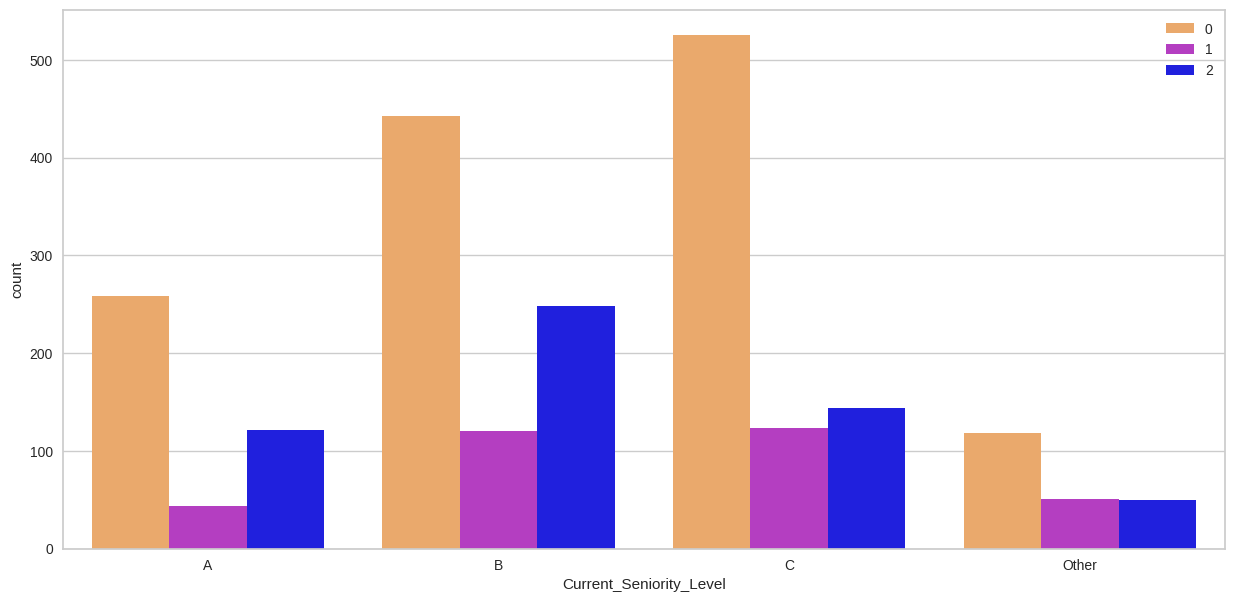

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_K_Means, x = data_K_Means["Current_Seniority_Level"],hue=data_K_Means["K_means_segments"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

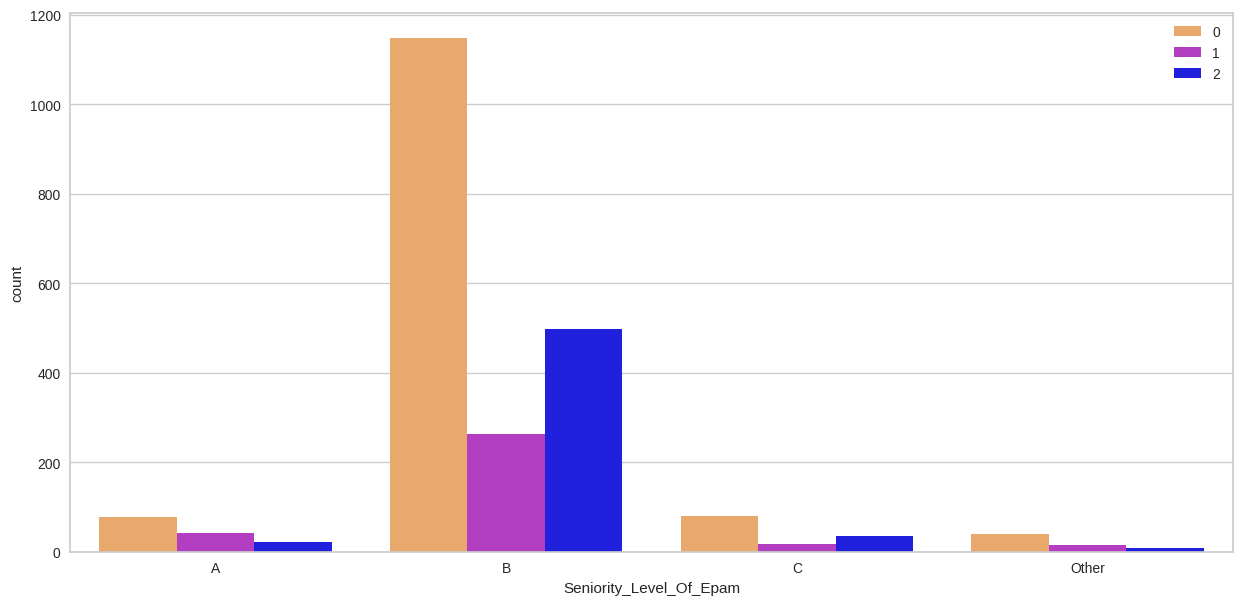

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_K_Means, x = data_K_Means["Seniority_Level_Of_Epam"],hue=data_K_Means["K_means_segments"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

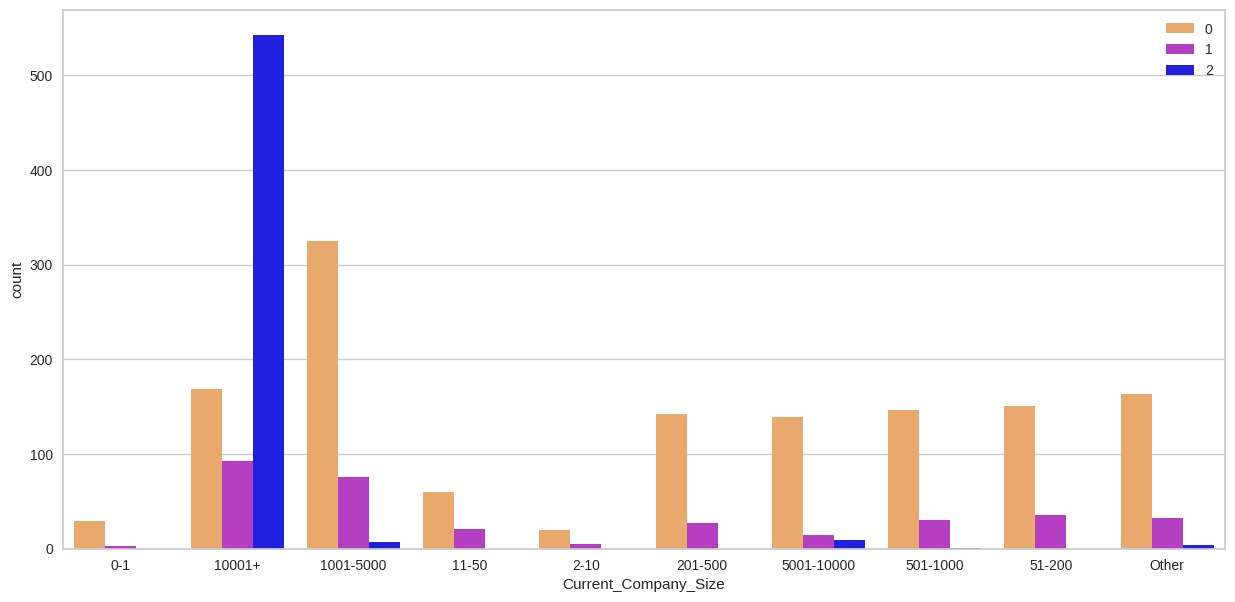

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = data_K_Means, x = data_K_Means["Current_Company_Size"],hue=data_K_Means["K_means_segments"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

5.2 **Hierarchical Clustering and PCA**

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree.

It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points.

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined.

That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(data_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(data_scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(data_scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

5.2.1 Cophenetic Correlation On Dendogram

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**5.2.2 Agglomerative Clustering With Complete Linkage with Affinity Euclidean With 4 Clusters** 

In [ ]:
HCmodel_complete = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="complete")
HCmodel_complete.fit(data_scaled)

**5.2.3 Cluster Profiling Complete Linkage with Affinity Euclidean With 4 Clusters**

In [ ]:
data_hier_clustering_complete=data.copy()

In [ ]:
datascaled_hier_clustering_complete=data_scaled.copy()

In [ ]:
datascaled_hier_clustering_complete["HC_Clusters"] = HCmodel_complete.labels_


In [ ]:
data_hier_clustering_complete["HC_Clusters"] = HCmodel_complete.labels_

In [ ]:
data_hier_clustering_complete

In [ ]:
cluster_profile_complete = data_hier_clustering_complete.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile_complete["count_in_each_segments"] = (
    data_hier_clustering_complete.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

In [ ]:
# let's see the names of the countries in each cluster
for cl in data_hier_clustering_complete["HC_Clusters"].unique():
    print("In cluster {}, Customers are :".format(cl))
    print(data_hier_clustering_complete[data_hier_clustering_complete["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

**5.3 Dimensionality Reduction using PCA for visualization**

In [ ]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 5
pca = PCA(n_components=5)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(data_scaled)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2",'Component 3','Component 4','Component 5']
)

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.bar(list(range(1,6)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
pca.components_

In [ ]:
plt.step(list(range(1,6)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

5.3.1 Dimensionality Reduction using PCA to two components

In [ ]:
pca2 = PCA(n_components=2)
pca2.fit(data_scaled)
print(pca2.components_)
print(pca2.explained_variance_ratio_)
Xpca2 = pca2.transform(data_scaled)

In [ ]:
sns.pairplot(pd.DataFrame(Xpca2))

In [ ]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=data_hier_clustering_ward["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))